<a href="https://colab.research.google.com/github/nirupira/NiruTestGIT/blob/main/ADHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Basic Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox, yeojohnson
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway, chi2_contingency
import os
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [124]:
os.makedirs("Outputs",exist_ok=True)

In [125]:
df=pd.read_csv("Feature_ADHD.csv")

In [126]:
print(os.getcwd())

/content


In [127]:
# Load data dictionary
print(os.getcwd())
print(os.listdir())
data_dict = pd.read_excel("/content/Feature_ADHD_DataDictionary.xlsx")

/content
['.config', 'Feature_ADHD.csv', 'Feature_ADHD.xlsx', 'transformation_log.csv', 'Feature_ADHD_DataDictionary.xlsx', 'Outputs', 'sample_data']


In [128]:
df

,HHX,AFNOW,AGEP_C,BMICAT_C,CITZNSTP_C,EMERG12MTC_C,HEARAID_C,HHRESPSC_FLG,HHSTAT_C,HISPALLP_C,...,WELLNESS_C,SIDEWALK_C,BIKE_C,WALK_C,STRENGTH_C,PADAYS_C,PEGYM_C,SPORT_C,ADHDNW_C,ADHDEV_C
0,H000021,2.0,15,4.0,1,0,2.0,1.0,1,2,...,1.0,1.0,2.0,4.0,2.0,4.0,1.0,1.0,NaN,2.0
1,H000022,2.0,3,NaN,1,0,2.0,1.0,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,H000034,2.0,3,NaN,1,0,2.0,1.0,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,H000039,2.0,1,NaN,1,0,NaN,1.0,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H000052,2.0,14,4.0,1,0,2.0,1.0,1,2,...,1.0,2.0,1.0,9.0,2.0,2.0,1.0,2.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,H073031,2,17,2,1,1,2,1,1,1,...,1,1,1,4,4,4,1,1,2,1
8415,H075310,2,8,NaN,1,0,2,1,1,1,...,1,2,1,2,2,3,1,1,2,1
8416,H075561,2,16,3,1,0,2,1,1,2,...,2,1,1,4,4,4,1,2,2,1
8417,H079441,2,13,2,1,0,2,1,1,7,...,1,1,1,4,2,3,1,1,2,1


# Basic Checks

In [129]:
# Shape
df.shape

(8419, 106)

In [130]:
# Prit all columns
df.columns

Index(['HHX', 'AFNOW', 'AGEP_C', 'BMICAT_C', 'CITZNSTP_C', 'EMERG12MTC_C',
       'HEARAID_C', 'HHRESPSC_FLG', 'HHSTAT_C', 'HISPALLP_C',
       ...
       'WELLNESS_C', 'SIDEWALK_C', 'BIKE_C', 'WALK_C', 'STRENGTH_C',
       'PADAYS_C', 'PEGYM_C', 'SPORT_C', 'ADHDNW_C', 'ADHDEV_C'],
      dtype='object', length=106)

In [131]:
df.dtypes

,0
HHX,object
AFNOW,object
AGEP_C,object
BMICAT_C,object
CITZNSTP_C,object
...,...
PADAYS_C,object
PEGYM_C,object
SPORT_C,object
ADHDNW_C,object


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8419 entries, 0 to 8418
Columns: 106 entries, HHX to ADHDEV_C
dtypes: float64(3), object(103)
memory usage: 6.8+ MB


In [133]:
df.describe()

,Unnamed: 59,Unnamed: 60,Unnamed: 61
count,906.000000,906.000000,906.000000
mean,1.406181,1.259382,1.264901
std,0.651836,0.548272,0.596883
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000
max,7.000000,7.000000,9.000000


In [134]:
df.head()

,HHX,AFNOW,AGEP_C,BMICAT_C,CITZNSTP_C,EMERG12MTC_C,HEARAID_C,HHRESPSC_FLG,HHSTAT_C,HISPALLP_C,...,WELLNESS_C,SIDEWALK_C,BIKE_C,WALK_C,STRENGTH_C,PADAYS_C,PEGYM_C,SPORT_C,ADHDNW_C,ADHDEV_C
0,H000021,2.0,15,4.0,1,0,2.0,1.0,1,2,...,1.0,1.0,2.0,4.0,2.0,4.0,1.0,1.0,NaN,2.0
1,H000022,2.0,3,NaN,1,0,2.0,1.0,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,H000034,2.0,3,NaN,1,0,2.0,1.0,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,H000039,2.0,1,NaN,1,0,NaN,1.0,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H000052,2.0,14,4.0,1,0,2.0,1.0,1,2,...,1.0,2.0,1.0,9.0,2.0,2.0,1.0,2.0,NaN,2.0


# Step 1: Recode/clean/ drop ID var

## Handling Missing Values

In [135]:
# Checking missing values
df.isnull().sum()

,0
HHX,8
AFNOW,56
AGEP_C,8
BMICAT_C,4249
CITZNSTP_C,8
...,...
PADAYS_C,2543
PEGYM_C,2543
SPORT_C,2543
ADHDNW_C,7469


In [136]:
# Replace special missing codes with np.nan
missing_codes = [7,8,9,97,98,99]
df_clean=df.replace(missing_codes,np.nan)

In [137]:
df_clean

,HHX,AFNOW,AGEP_C,BMICAT_C,CITZNSTP_C,EMERG12MTC_C,HEARAID_C,HHRESPSC_FLG,HHSTAT_C,HISPALLP_C,...,WELLNESS_C,SIDEWALK_C,BIKE_C,WALK_C,STRENGTH_C,PADAYS_C,PEGYM_C,SPORT_C,ADHDNW_C,ADHDEV_C
0,H000021,2.0,15,4.0,1,0,2.0,1.0,1,2,...,1.0,1.0,2.0,4.0,2.0,4.0,1.0,1.0,NaN,2.0
1,H000022,2.0,3,NaN,1,0,2.0,1.0,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,H000034,2.0,3,NaN,1,0,2.0,1.0,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,H000039,2.0,1,NaN,1,0,NaN,1.0,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H000052,2.0,14,4.0,1,0,2.0,1.0,1,2,...,1.0,2.0,1.0,NaN,2.0,2.0,1.0,2.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,H073031,2,17,2,1,1,2,1,1,1,...,1,1,1,4,4,4,1,1,2,1
8415,H075310,2,8,NaN,1,0,2,1,1,1,...,1,2,1,2,2,3,1,1,2,1
8416,H075561,2,16,3,1,0,2,1,1,2,...,2,1,1,4,4,4,1,2,2,1
8417,H079441,2,13,2,1,0,2,1,1,7,...,1,1,1,4,2,3,1,1,2,1


In [138]:
# Drop variable
drop_cols=["HHRESPSC_FLG","HHSTAT_C",]
df_clean=df_clean.drop(columns=drop_cols,errors="ignore")

In [139]:
df_clean.to_csv("Outputs/1_clean.csv",index=False)

In [140]:
df_clean.shape

(8419, 104)

In [141]:
df_clean.duplicated().sum()

np.int64(3)

In [142]:
df_clean.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8414,False
8415,False
8416,False
8417,True


In [143]:
# Insight: data is not have repeated values

In [144]:
print(df_clean.dtypes)

HHX           object
AFNOW         object
AGEP_C        object
BMICAT_C      object
CITZNSTP_C    object
               ...  
PADAYS_C      object
PEGYM_C       object
SPORT_C       object
ADHDNW_C      object
ADHDEV_C      object
Length: 104, dtype: object


# Step 2: Handling misclassification

In [145]:
def detect_pre_imputation_misclass(df, threshold_unique=10, frac_numeric_thresh=0.8):
    suspects = []
    n = len(df)
    for col in df.columns:
        series = df[col]
        conv = pd.to_numeric(series, errors="coerce")
        non_na = conv.notna().sum()
        frac_num = non_na / n
        unique = series.nunique(dropna=True)
        sk = None
        if non_na > 2:
            try:
                sk = skew(conv.dropna(), bias=False)
            except:
                sk = None
        if frac_num > frac_numeric_thresh and unique > threshold_unique:
            suspects.append((col, "Likely numeric", frac_num, unique, sk))
        elif frac_num > frac_numeric_thresh and unique <= threshold_unique:
            suspects.append((col, "Ambiguous numeric-like", frac_num, unique, sk))
        elif frac_num < 0.5 and unique > threshold_unique:
            suspects.append((col, "Likely categorical", frac_num, unique, sk))
    return suspects

print("Pre-imputation suspects:")
for s in detect_pre_imputation_misclass(df_clean):
    print(s)


Pre-imputation suspects:
('HHX', 'Likely categorical', np.float64(0.0), 8361, None)
('AFNOW', 'Ambiguous numeric-like', np.float64(0.9932295997149305), 5, np.float64(-7.620629043440714))
('AGEP_C', 'Likely numeric', np.float64(0.8506948568713624), 34, np.float64(-0.2246785155912816))
('CITZNSTP_C', 'Ambiguous numeric-like', np.float64(0.989428673239102), 6, np.float64(14.0557501442782))
('EMERG12MTC_C', 'Likely numeric', np.float64(0.994061052381518), 12, np.float64(3.301630339866664))
('HEARAID_C', 'Ambiguous numeric-like', np.float64(0.8913172585817793), 4, np.float64(-11.244449547022754))
('HISPALLP_C', 'Likely numeric', np.float64(0.9515381874331869), 14, np.float64(1.5714586458261999))
('INJSCHDYTC_C', 'Likely categorical', np.float64(0.04513600190046324), 12, np.float64(2.9030548327409944))
('PARSEX1_C', 'Ambiguous numeric-like', np.float64(0.9783822306687255), 5, np.float64(-0.43986729461007945))
('PARWORK1_C', 'Ambiguous numeric-like', np.float64(0.9668606722888704), 6, np.floa

# Step 3: Impute missing values based on skewness

## Replace using skewness

In [146]:
def impute_missing_by_skew_with_override(
    df,
    numeric_cols=None,
    categorical_cols=None,
    skew_threshold=0.5,
    overrides: dict = None
):

    df2 = df.copy()
    report = []
    overrides = overrides or {}

    # If numeric_cols or categorical_cols not given
    if numeric_cols is None:
        numeric_cols = df2.select_dtypes(include=np.number).columns.tolist()
    if categorical_cols is None:
        categorical_cols = [c for c in df2.columns if c not in numeric_cols]

    # Ensure overridden columns are in right list
    for col, typ in overrides.items():
        if typ == "numeric":
            if col in categorical_cols:
                categorical_cols.remove(col)
            if col not in numeric_cols:
                numeric_cols.append(col)
        elif typ == "categorical":
            if col in numeric_cols:
                numeric_cols.remove(col)
            if col not in categorical_cols:
                categorical_cols.append(col)
        else:
            raise ValueError(f"Override type for {col} must be 'numeric' or 'categorical'")

    # Numeric imputation
    for col in numeric_cols:
        # Convert to numeric, invalid to NaN
        s = pd.to_numeric(df2[col], errors="coerce")
        df2[col + "_missflag"] = s.isnull().astype(int)
        nonnull = s.dropna()
        if len(nonnull) == 0:
            report.append((col, "numeric", None, "all missing"))
            continue
        sk = skew(nonnull, bias=False)
        if abs(sk) <= skew_threshold:
            fill = nonnull.mean()
            strategy = "mean"
        else:
            fill = nonnull.median()
            strategy = "median"
        df2[col] = s.fillna(fill)
        report.append((col, "numeric", float(sk), strategy))

    # Categorical imputation
    for col in categorical_cols:
        s = df2[col]
        df2[col + "_missflag"] = s.isnull().astype(int)
        nonnull = s.dropna()
        if len(nonnull) == 0:
            report.append((col, "categorical", None, "all missing"))
            continue
        mode_val = nonnull.mode(dropna=True)
        if mode_val.empty:
            fill = np.nan
        else:
            fill = mode_val.iloc[0]
        df2[col] = s.fillna(fill)
        report.append((col, "categorical", None, "mode"))

    report_df = pd.DataFrame(report, columns=["variable", "type", "skewness", "imputation"])
    return df2, report_df


In [147]:
overrides = {
    "AGEP_C": "numeric",
    "EMERG12MTC_C": "numeric",
    "INJSCHDYTC_C": "numeric",
    "POVRATTC_C": "numeric",
    "RETAILHC12MTC_C": "numeric",
    "SCHDYMSSTC_C": "numeric",
    "URGCC12MTC_C": "numeric",
    "PARAGETC1_C": "numeric",
    "PARAGETC2_C": "numeric",
    "PCNTPARNTS_C": "numeric",
    "FDSRUNOUT_C": "numeric",
    "HOUYRSLIV_C": "numeric",
    "MAXPAREDUP_C": "numeric",
    "MAXEDUCP_C": "numeric",
}


# Define exclude (IDs, targets)
exclude = ["HHX", "ADHDEV_C", "ADHDNW_C"]
num_cols = [c for c in df_clean.columns if c not in exclude and df_clean[c].dtype in [np.int64, np.float64]]
cat_cols = [c for c in df_clean.columns if c not in exclude and c not in num_cols]

df_imputed, imputation_report = impute_missing_by_skew_with_override(
    df_clean,
    numeric_cols=num_cols,
    categorical_cols=cat_cols,
    skew_threshold=0.5,
    overrides=overrides
)

print(imputation_report.head(20))
df_imputed.to_csv("Outputs/2_imputed.csv",index=False)
imputation_report.to_csv("Outputs/2_imputation_report.csv", index=False)


           variable         type  skewness imputation
0       Unnamed: 59      numeric  1.308484     median
1       Unnamed: 60      numeric  1.931107     median
2       Unnamed: 61      numeric  1.903534     median
3            AGEP_C      numeric -0.224679       mean
4      EMERG12MTC_C      numeric  3.301630     median
5      INJSCHDYTC_C      numeric  2.903055     median
6        POVRATTC_C      numeric  1.095845     median
7   RETAILHC12MTC_C      numeric  4.699452     median
8      SCHDYMSSTC_C      numeric  6.595872     median
9      URGCC12MTC_C      numeric  2.439229     median
10      PARAGETC1_C      numeric  0.217726       mean
11      PARAGETC2_C      numeric  0.170946       mean
12     PCNTPARNTS_C      numeric -1.214623     median
13      FDSRUNOUT_C      numeric -1.816163     median
14      HOUYRSLIV_C      numeric  0.007467       mean
15     MAXPAREDUP_C      numeric  0.727668     median
16       MAXEDUCP_C      numeric  0.759275     median
17            AFNOW  categor

In [148]:
df_imputed

,HHX,AFNOW,AGEP_C,BMICAT_C,CITZNSTP_C,EMERG12MTC_C,HEARAID_C,HISPALLP_C,INJSCHDYTC_C,MARSTAT1_C,...,WEARGLSS_C_missflag,WELLVIS_C_missflag,WELLNESS_C_missflag,SIDEWALK_C_missflag,BIKE_C_missflag,WALK_C_missflag,STRENGTH_C_missflag,PADAYS_C_missflag,PEGYM_C_missflag,SPORT_C_missflag
0,H000021,2.0,15.000000,4.0,1,0.0,2.0,2,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
1,H000022,2.0,3.000000,2.0,1,0.0,2.0,2,0.0,1.0,...,0,1,0,1,1,1,1,1,1,1
2,H000034,2.0,3.000000,2.0,1,0.0,2.0,2,0.0,5.0,...,0,1,0,1,1,1,1,1,1,1
3,H000039,2.0,1.000000,2.0,1,0.0,2.0,2,0.0,1.0,...,1,1,0,1,1,1,1,1,1,1
4,H000052,2.0,14.000000,4.0,1,0.0,2.0,2,0.0,1.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,H073031,2,17.000000,2,1,1.0,2,1,0.0,1,...,0,1,0,0,0,0,0,0,0,0
8415,H075310,2,8.000000,2.0,1,0.0,2,1,0.0,1,...,0,1,0,0,0,0,0,0,0,0
8416,H075561,2,16.000000,3,1,0.0,2,2,0.0,7,...,0,0,0,0,0,0,0,0,0,0
8417,H079441,2,13.000000,2,1,0.0,2,7,0.0,1,...,0,1,0,0,0,0,0,0,0,0


In [149]:
df_imputed.shape

(8419, 205)

# Step: Validate misclasification after imputation

In [150]:
def detect_post_imputation_misclass(df, report_df, threshold_unique=20, frac_numeric_thresh=0.9):

    suspects = []
    n = len(df)

    # variable → current type (numeric / categorical)
    type_map = dict(zip(report_df["variable"], report_df["type"]))

    for col in report_df["variable"]:
        # Skip if missing-flag column
        if col.endswith("_missflag"):
            continue
        # Only consider columns that exist in df
        if col not in df.columns:
            # Column might have been dropped or renamed skip
            continue

        typ = type_map.get(col, None)
        series = df[col]

        # Try to convert to numeric
        conv = pd.to_numeric(series, errors="coerce")
        non_na = conv.notna().sum()
        frac_num = non_na / n
        unique = series.nunique(dropna=True)

        # Compute skewness if enough numeric data
        sk = None
        if non_na > 2:
            try:
                sk = skew(conv.dropna(), bias=False)
            except Exception:
                sk = None

        # Heuristic checks
        if typ == "categorical":
            if frac_num > frac_numeric_thresh and unique > threshold_unique:
                suspects.append((col, "Likely numeric but classified categorical", frac_num, unique, sk))
            elif frac_num > frac_numeric_thresh and unique <= threshold_unique:
                suspects.append((col, "Ambiguous: numeric-like but few unique", frac_num, unique, sk))
        elif typ == "numeric":
            if frac_num < 0.5:
                suspects.append((col, "Numeric but many non-numeric entries", frac_num, unique, sk))
            # Also flag numeric with skewness not computable though many numeric
            if frac_num > frac_numeric_thresh and (sk is None or np.isnan(sk)):
                suspects.append((col, "Numeric type with NaN skewness", frac_num, unique, sk))
        else:
            # If report has no type for this col, still consider it
            if frac_num > frac_numeric_thresh and unique > threshold_unique:
                suspects.append((col, "Probably numeric (no type assigned)", frac_num, unique, sk))

    return suspects

suspect_list = detect_post_imputation_misclass(df_imputed, imputation_report)

print("Suspected misclassifications after imputation:")
for col, msg, frac_num, unique, sk in suspect_list:
    print(f"{col}: {msg} ")


Suspected misclassifications after imputation:
AFNOW: Ambiguous: numeric-like but few unique 
BMICAT_C: Ambiguous: numeric-like but few unique 
CITZNSTP_C: Ambiguous: numeric-like but few unique 
HEARAID_C: Ambiguous: numeric-like but few unique 
HISPALLP_C: Ambiguous: numeric-like but few unique 
MARSTAT1_C: Ambiguous: numeric-like but few unique 
MARSTAT2_C: Ambiguous: numeric-like but few unique 
PARSEX1_C: Ambiguous: numeric-like but few unique 
PARSEX2_C: Ambiguous: numeric-like but few unique 
PARWKFT1_C: Ambiguous: numeric-like but few unique 
PARWKFT2_C: Ambiguous: numeric-like but few unique 
PARWORK1_C: Ambiguous: numeric-like but few unique 
PARWORK2_C: Ambiguous: numeric-like but few unique 
PHSTAT_C: Ambiguous: numeric-like but few unique 
RACEALLP_C: Ambiguous: numeric-like but few unique 
RATCAT_C: Likely numeric but classified categorical 
RX12M_C: Ambiguous: numeric-like but few unique 
RXDL12M_C: Ambiguous: numeric-like but few unique 
SEX_C: Ambiguous: numeric-like b

In [151]:
def apply_dictionary_overrides(data_dict, suspect_list, dict_var_col="Variable Name", dict_type_col="type"):

    overrides = {}
    # Lower-case dictionary types
    dict_type_map = dict(zip(data_dict[dict_var_col], data_dict[dict_type_col].str.lower()))

    for (col, msg, *rest) in suspect_list:
        if col not in dict_type_map:
            continue
        dtyp = dict_type_map[col]
        # Map dictionary string to override type
        if "categorical" in dtyp or "cat" in dtyp or "category" in dtyp:
            overrides[col] = "categorical"
        elif "numerical" in dtyp or "num" in dtyp or "continuous" in dtyp:
            overrides[col] = "numeric"
        else:
            # dictionary type is ambiguous or not recognized
            pass

    return overrides

def compare_suspects_with_dictionary(suspect_list, data_dict, dict_var_col="Variable Name", dict_type_col="type"):
    records = []
    dict_type_map = dict(zip(data_dict[dict_var_col], data_dict[dict_type_col]))
    for (col, msg, *rest) in suspect_list:
        dict_type = dict_type_map.get(col, None)
        # Heuristic classification
        if "Likely numeric" in msg:
            heuristic = "numeric"
        elif "numeric-like" in msg:
            heuristic = "numeric_like"
        else:
            heuristic = "other"
        # Determine conflict
        conflict = None
        if dict_type is not None:
            d = dict_type.lower()
            if ("cat" in d) and heuristic == "numeric":
                conflict = True
            elif ("num" in d) and heuristic == "numeric":
                conflict = False
        records.append((col, msg, dict_type, heuristic, conflict))
    return pd.DataFrame(records, columns=["variable", "heuristic_msg", "dict_type", "heuristic_suggestion", "conflict"])

dict_overrides = apply_dictionary_overrides(data_dict, suspect_list)
print("Dictionary-based overrides:", dict_overrides)

comparison_df = compare_suspects_with_dictionary(suspect_list, data_dict)
print("Comparison between heuristic vs dictionary:")
print(comparison_df.head(20))
print("Conflicts (heuristic vs dict):")
print(comparison_df[comparison_df["conflict"] == True])


Dictionary-based overrides: {'AFNOW': 'categorical', 'BMICAT_C': 'categorical', 'CITZNSTP_C': 'categorical', 'HEARAID_C': 'categorical', 'HISPALLP_C': 'categorical', 'MARSTAT1_C': 'categorical', 'MARSTAT2_C': 'categorical', 'PARSEX1_C': 'categorical', 'PARSEX2_C': 'categorical', 'PARWKFT1_C': 'categorical', 'PARWKFT2_C': 'categorical', 'PARWORK1_C': 'categorical', 'PARWORK2_C': 'categorical', 'PHSTAT_C': 'categorical', 'RACEALLP_C': 'categorical', 'RATCAT_C': 'categorical', 'RX12M_C': 'categorical', 'RXDL12M_C': 'categorical', 'SEX_C': 'categorical', 'USUALPL_C': 'categorical', 'VISIONDF_C': 'categorical', 'YRSINUS_C': 'categorical', 'SCREENTIME_C': 'categorical', 'RESTED_C': 'categorical', 'CRIME_C': 'categorical', 'TRAFFIC_C': 'categorical', 'PARKS_C': 'categorical', 'BEHDFFCS_C': 'categorical', 'LEARNDF_C': 'categorical', 'BEHDFMKFR_C': 'categorical', 'BEHDFCHG_C': 'categorical', 'BEHDFCNTR_C': 'categorical', 'BEHKBHYG_C': 'categorical', 'BEHDFPLYG_C': 'categorical', 'REMEMBERDF_C':

##### Apply transformation (to improve skewness) using Histogram and Q-Q plot for numeric columns

In [152]:
# For each variable flagged as highly skewed, the function will test transformations and apply the one that reduces skew.
def inspect_and_transform(df, numeric_cols, skew_threshold=1.0, transform_methods=["log", "sqrt", "yeo"]):

    transformed = {}
    df_out=df.copy()
    for col in numeric_cols:
        series_full = pd.to_numeric(df_out[col], errors="coerce")

        # Mask of non-NA entries
        mask=series_full.notna()
        series=series_full[mask]

        if series.shape[0] < 10: # Skip columns with too few observations
            continue

        sk = skew(series, bias=False) # Computes skewness of original data
        print(f"\n{col} — skewness: {sk:.3f}")

        # Plot histogram + Q-Q Show visual distribution and how it compares to a normal line
        fig, axes = plt.subplots(1, 2, figsize=(10,4))
        sns.histplot(series, kde=True, ax=axes[0])
        axes[0].set_title(f"{col} histogram")
        stats.probplot(series, dist="norm", plot=axes[1])
        axes[1].set_title(f"{col} Q-Q plot")
        plt.tight_layout()
        plt.show()

        if abs(sk) > skew_threshold: # If the skew is large (outside threshold)
            print(" → high skew, attempting transforms:")
            for method in transform_methods: # Iterate possible transformations (log, sqrt, Yeo-Johnson)
                try:
                    if method == "log":
                        if (series <= 0).any(): # Skip log transformation if any non-positive values exist
                            continue
                        t = np.log(series)
                    elif method == "sqrt":
                        if (series < 0).any():
                            continue
                        t = np.sqrt(series)
                    elif method == "yeo":
                        pt = PowerTransformer(method="yeo-johnson")
                        t = pt.fit_transform(series.values.reshape(-1,1)).flatten()
                    else:
                        continue
                except Exception as e:
                    continue
                sk_t = skew(t, bias=False)
                print(f"    {method}: skewness = {sk_t:.3f}")
                stats.probplot(t, dist="norm", plot=plt)
                plt.title(f"{col} after {method}")
                plt.show()
                # If transform helps (reduces |skew|)
                if abs(sk_t) < abs(sk): # If transformed skew is closer to zero (less skew)
                    transformed[col] = (method, sk, sk_t) # Record which method was chosen, with before/after skew

                    # Build a full-length series with NaNs for missing parts
                    full_series = pd.Series(np.nan, index=df_out.index)
                    # Place transformed values back at same index positions
                    full_series.loc[series.index] = t
                    df_out[col] = full_series # Replace original column with transformed values
                    break # stop trying further transforms for this column
    return df_out, transformed



AGEP_C — skewness: -0.244


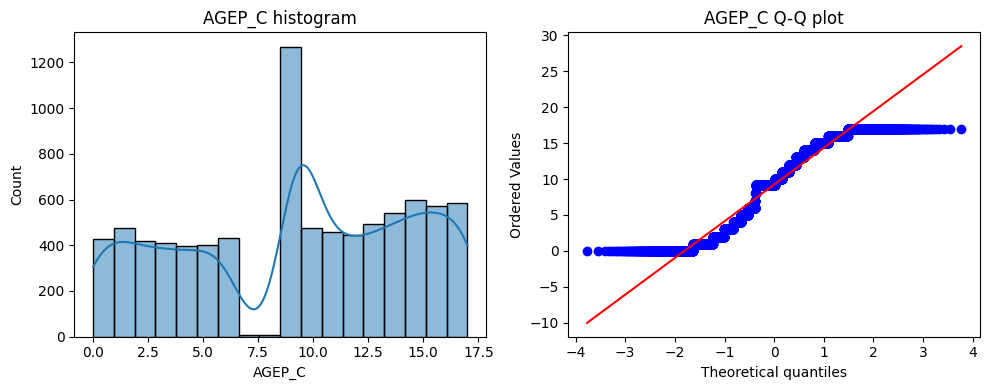


EMERG12MTC_C — skewness: 3.314


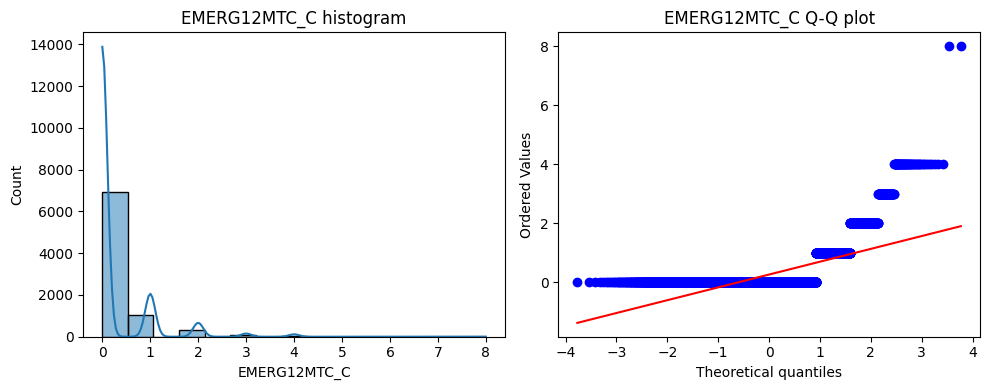

 → high skew, attempting transforms:
    sqrt: skewness = 2.003


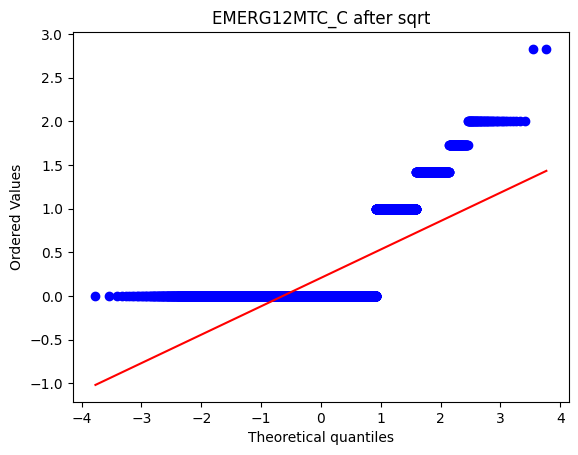


INJSCHDYTC_C — skewness: 15.018


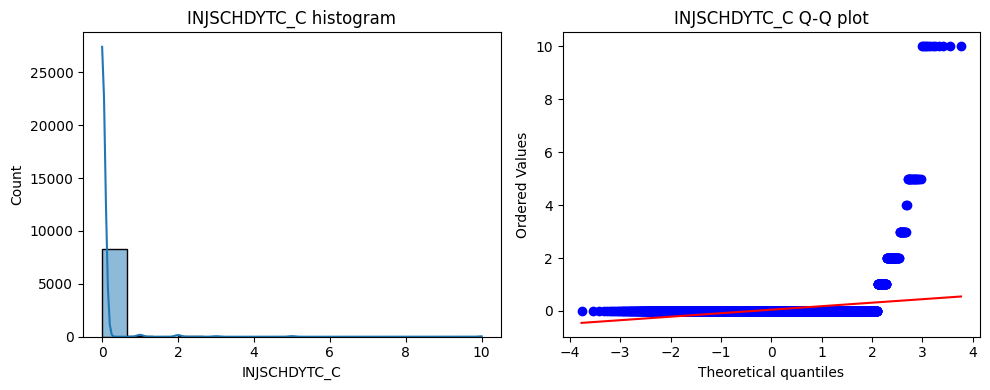

 → high skew, attempting transforms:
    sqrt: skewness = 9.387


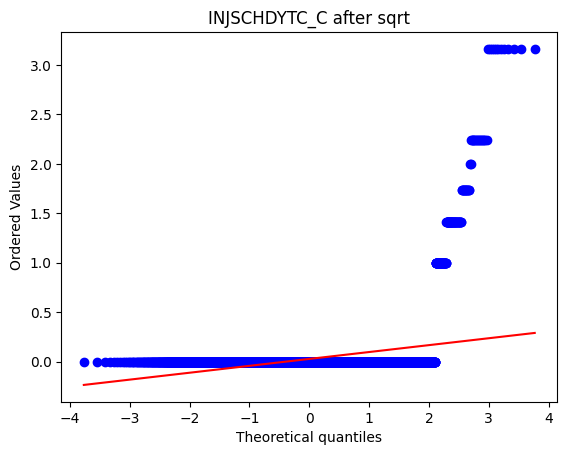


POVRATTC_C — skewness: 1.097


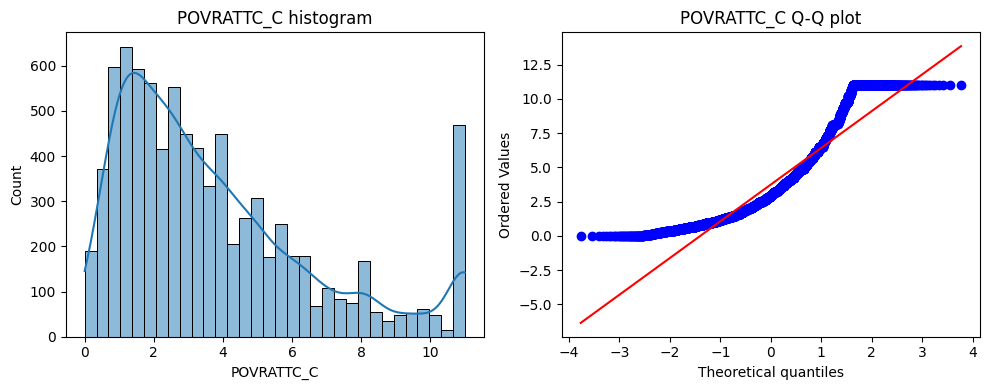

 → high skew, attempting transforms:
    sqrt: skewness = 0.351


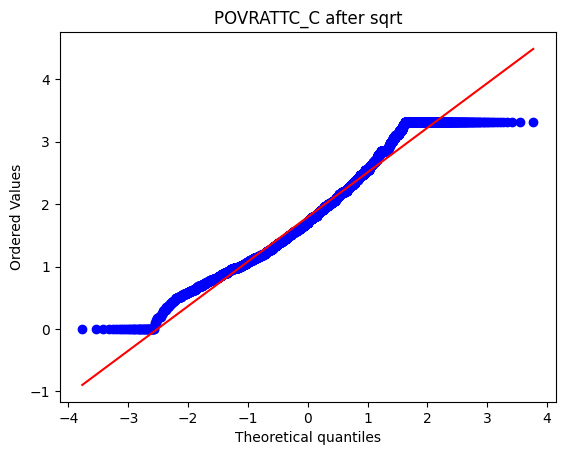


RETAILHC12MTC_C — skewness: 4.716


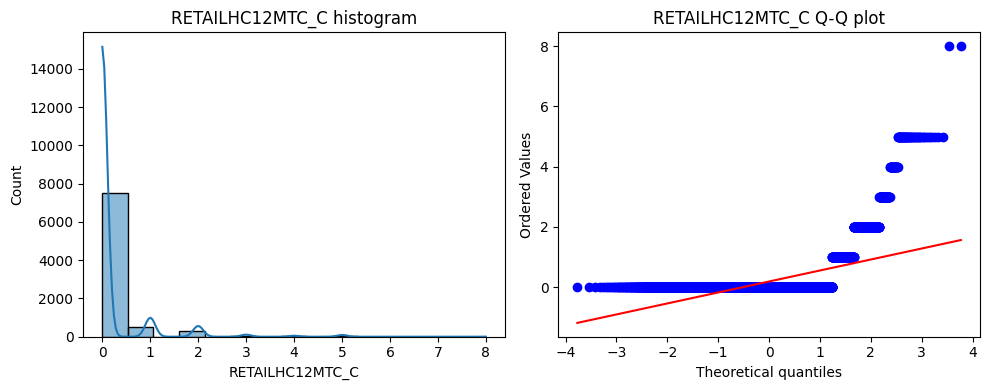

 → high skew, attempting transforms:
    sqrt: skewness = 3.018


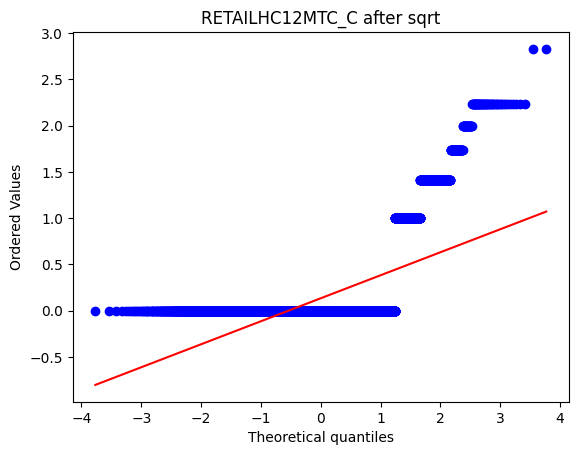


SCHDYMSSTC_C — skewness: 7.914


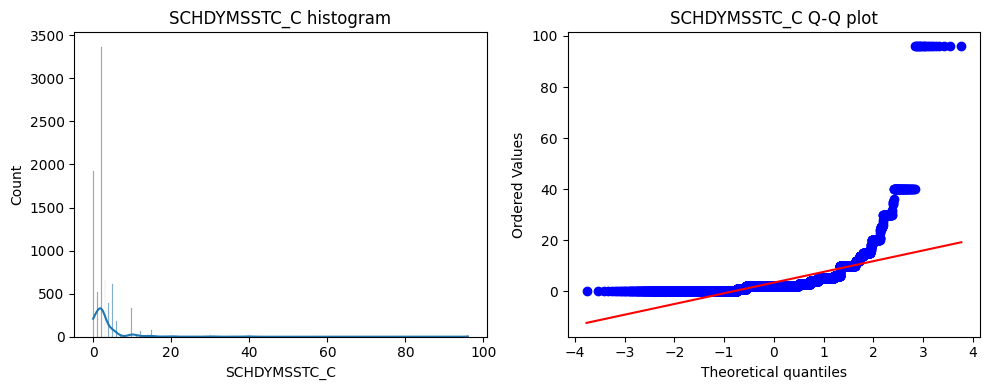

 → high skew, attempting transforms:
    sqrt: skewness = 1.721


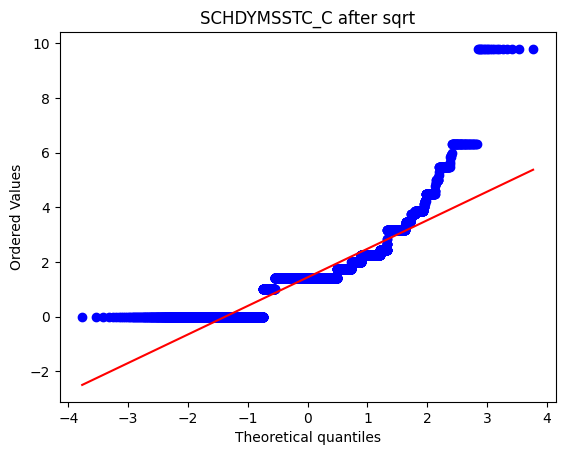


URGCC12MTC_C — skewness: 2.451


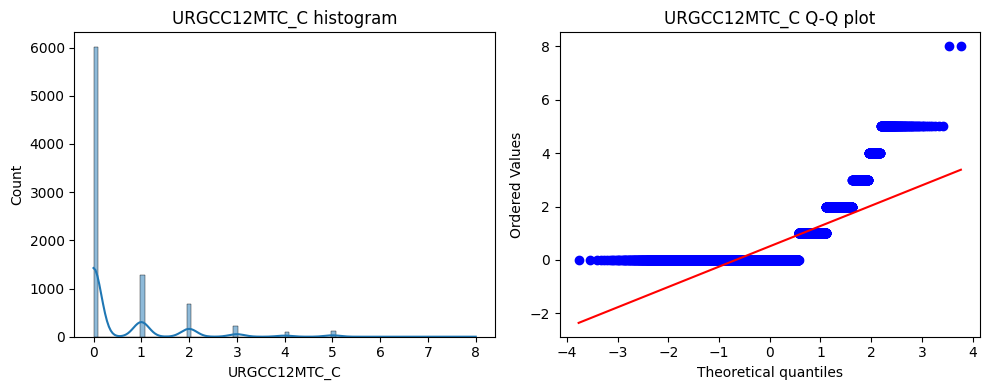

 → high skew, attempting transforms:
    sqrt: skewness = 1.335


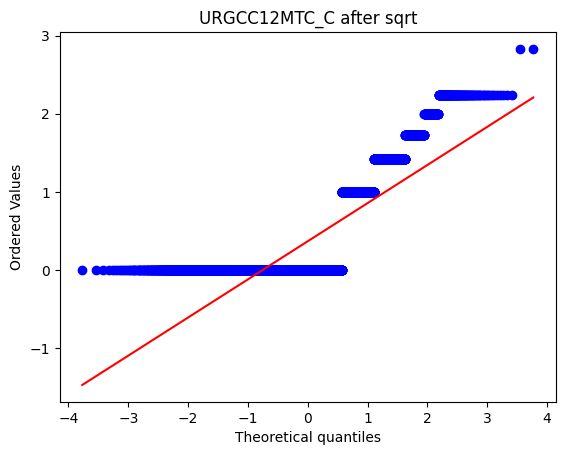


PARAGETC2_C — skewness: 0.205


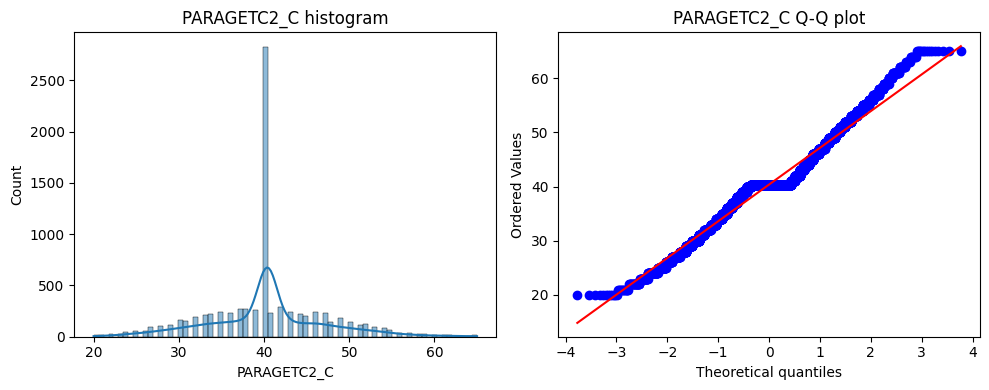


PARAGETC1_C — skewness: 0.220


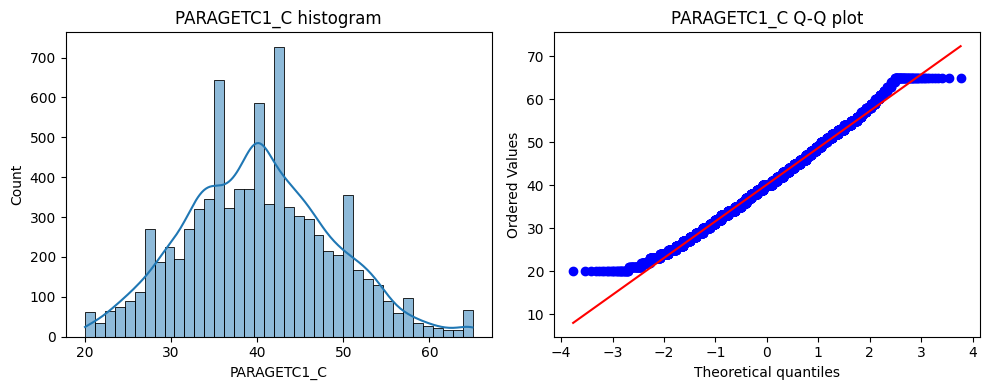


PCNTPARNTS_C — skewness: -1.216


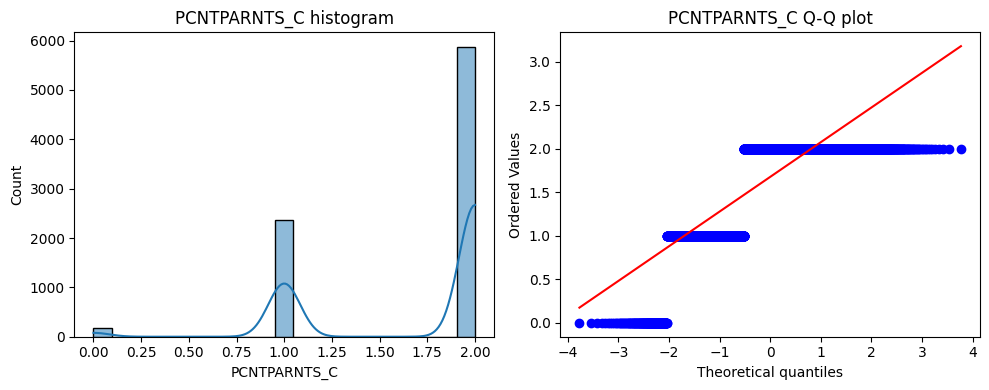

 → high skew, attempting transforms:
    sqrt: skewness = -2.540


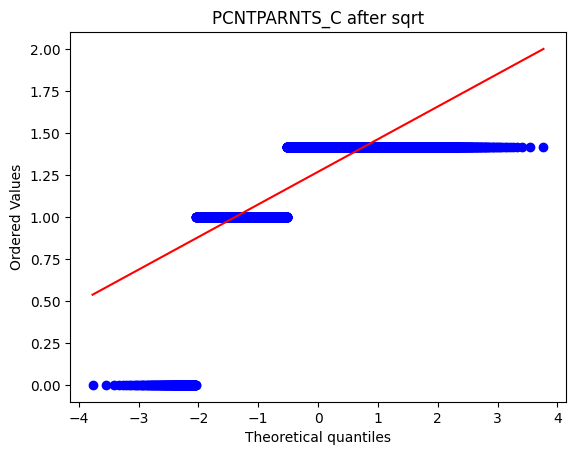

    yeo: skewness = -0.865


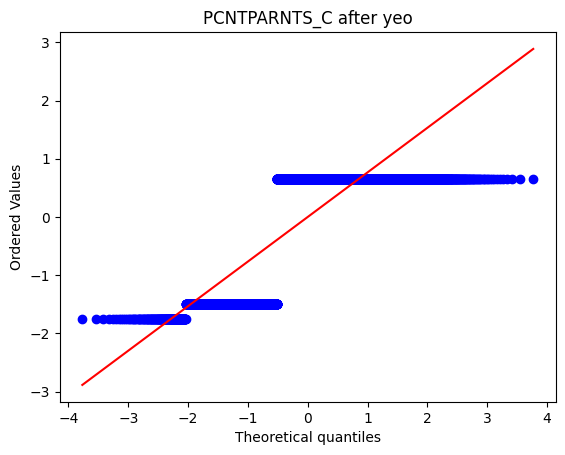


FDSNEDAYS_C — skewness: 21.539


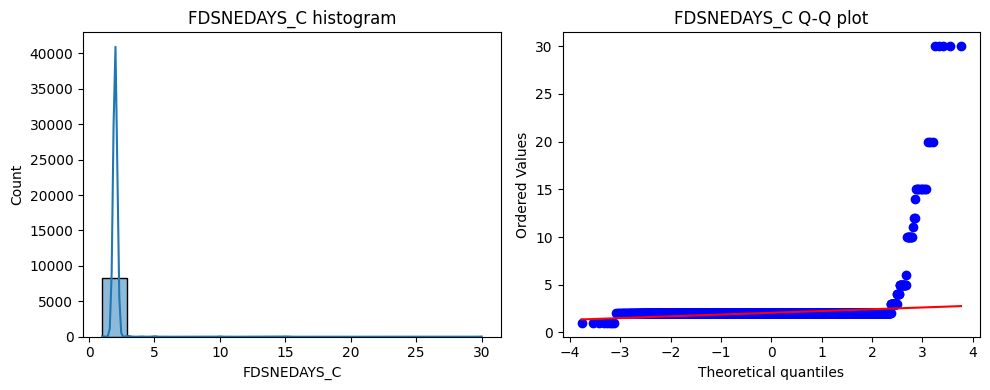

 → high skew, attempting transforms:
    log: skewness = 14.122


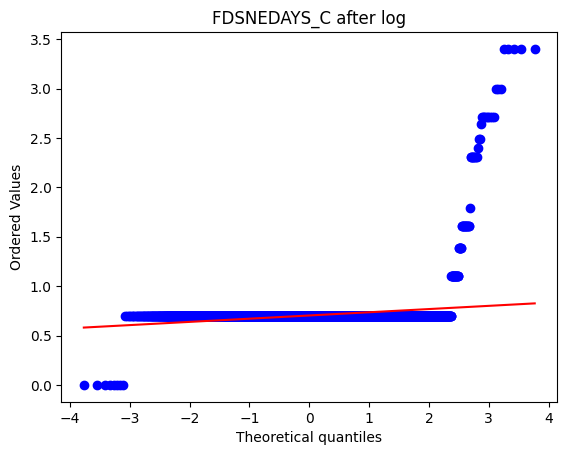


HOUYRSLIV_C — skewness: 0.008


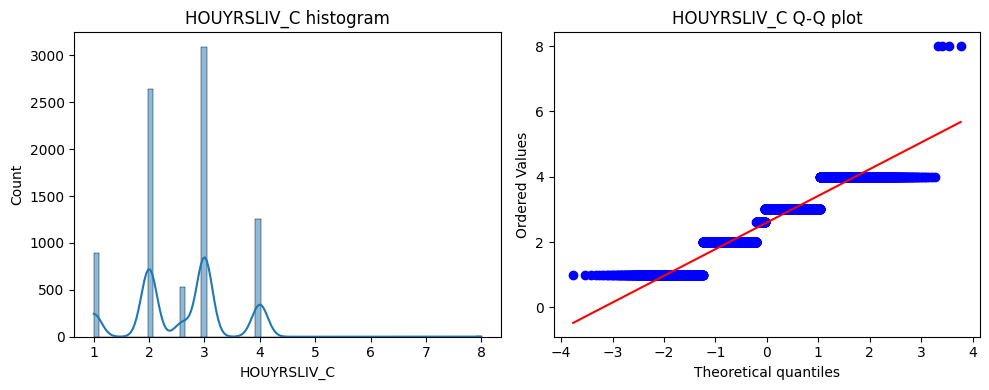


MAXPAREDUP_C — skewness: 1.669


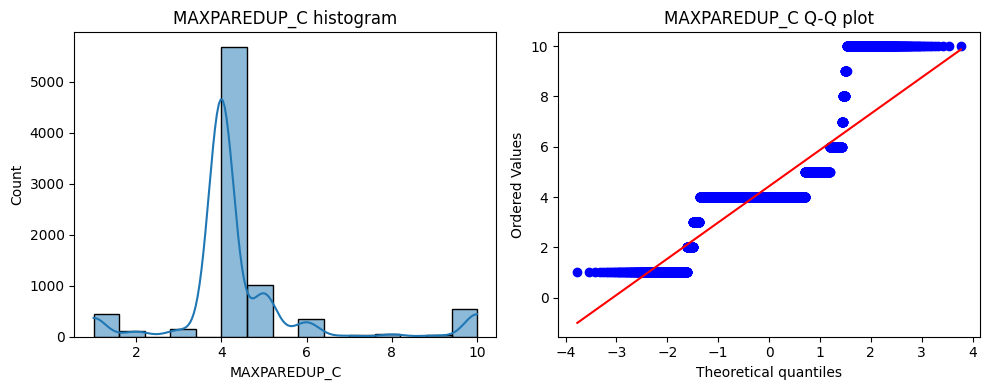

 → high skew, attempting transforms:
    log: skewness = -1.300


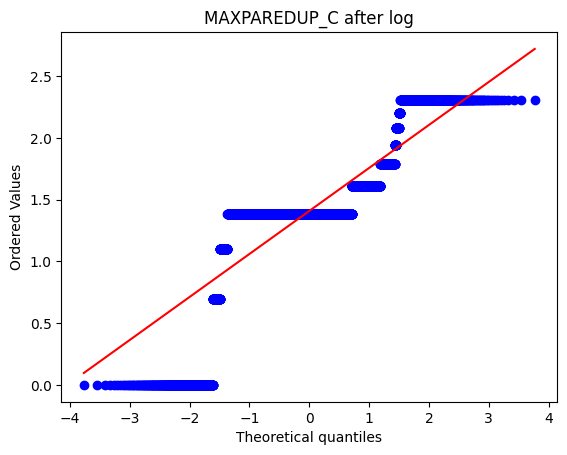


MAXEDUCP_C — skewness: 1.222


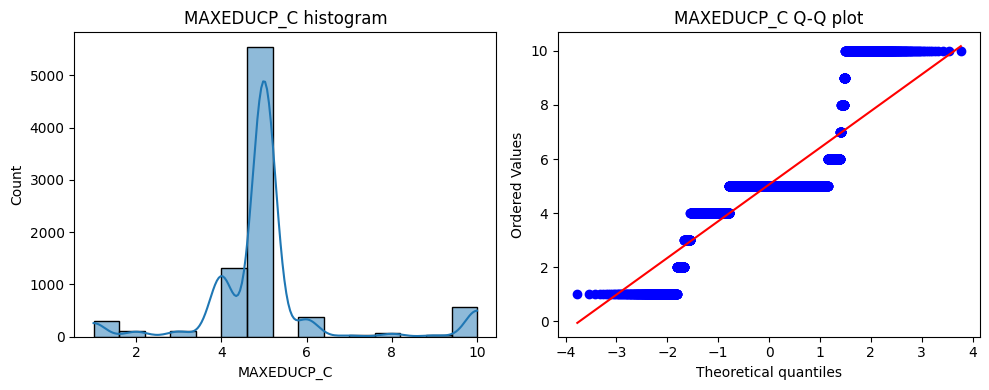

 → high skew, attempting transforms:
    log: skewness = -2.016


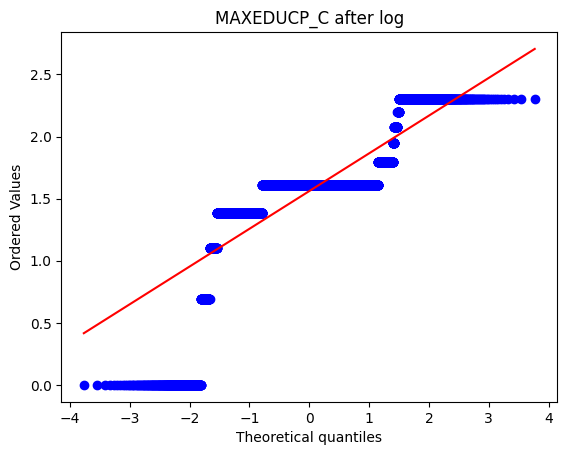

    sqrt: skewness = -0.249


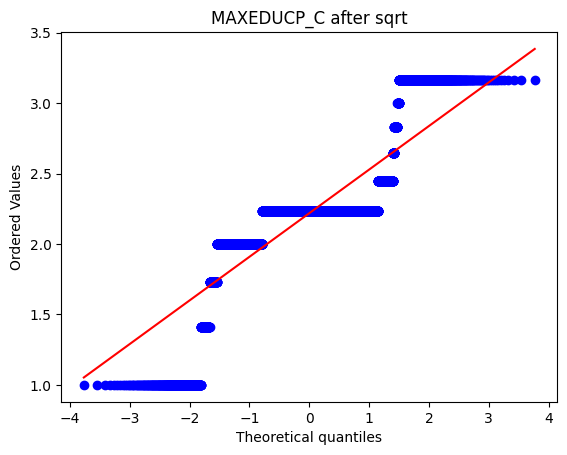

Transform info: {'EMERG12MTC_C': ('sqrt', np.float64(3.3135371854417413), np.float64(2.0025999637278575)), 'INJSCHDYTC_C': ('sqrt', np.float64(15.018120449824801), np.float64(9.38663724662921)), 'POVRATTC_C': ('sqrt', np.float64(1.097182397508441), np.float64(0.3513697289169991)), 'RETAILHC12MTC_C': ('sqrt', np.float64(4.716229492473407), np.float64(3.0181378538205696)), 'SCHDYMSSTC_C': ('sqrt', np.float64(7.914415646243889), np.float64(1.7212397865737352)), 'URGCC12MTC_C': ('sqrt', np.float64(2.450923405825005), np.float64(1.3349769424815567)), 'PCNTPARNTS_C': ('yeo', np.float64(-1.2162516485083243), np.float64(-0.865415692759021)), 'FDSNEDAYS_C': ('log', np.float64(21.5392127866282), np.float64(14.122103231049287)), 'MAXPAREDUP_C': ('log', np.float64(1.6687756132135012), np.float64(-1.299765513585665)), 'MAXEDUCP_C': ('sqrt', np.float64(1.2217181103731314), np.float64(-0.24882030957522236))}


In [153]:
# 2) Define numeric and categorical columns (based on corrected imputation plan)
numeric_cols = ["AGEP_C", "EMERG12MTC_C", "INJSCHDYTC_C", "POVRATTC_C", "RETAILHC12MTC_C",  "SCHDYMSSTC_C", "URGCC12MTC_C", "PARAGETC2_C", "PARAGETC1_C", "PCNTPARNTS_C", "FDSNEDAYS_C","HOUYRSLIV_C" ,"MAXPAREDUP_C","MAXEDUCP_C"]

# 4) Inspect and transform skewed numeric columns
df_transformed, transform_info = inspect_and_transform(df_imputed, numeric_cols, skew_threshold=1.0)
print("Transform info:", transform_info)
df_transformed.to_csv("Outputs/3_transformed.csv",index=False)
transf_df=pd.DataFrame([{"variable":col, "method": info[0], "skew_before": info[1], "skew_after": info[2]}
                       for col, info in transform_info.items()])
transf_df.to_csv("Outputs/3_transform_log.csv", index=False)

In [154]:
def build_transformation_log(original_df, transformed_df, transform_info, numeric_cols):

    records = []
    for col in numeric_cols:
        # Compute original skew
        series = pd.to_numeric(original_df[col], errors="coerce").dropna()
        if len(series) < 3:
            sk_orig = np.nan
        else:
            sk_orig = skew(series, bias=False)

        # Default values
        method = ""
        sk_trans = sk_orig
        applied = "No"

        # If the column was transformed (present in transform_info)
        if col in transform_info:
            method, sk_from_info, sk_to = transform_info[col]
            # Use the stored original and transformed skew from transform_info
            sk_orig = sk_from_info
            sk_trans = sk_to
            applied = "Yes"

        # Append a record
        records.append({
            "Variable": col,
            "Skew_Original": sk_orig,
            "Method": method,
            "Skew_Transformed": sk_trans,
            "Applied": applied
        })

    log_df = pd.DataFrame(records)
    return log_df

transformation_log = build_transformation_log(df_imputed, df_transformed, transform_info, numeric_cols)

print(transformation_log.head(10))
transformation_log.to_csv("transformation_log.csv", index=False)


          Variable  Skew_Original Method  Skew_Transformed Applied
0           AGEP_C      -0.243591                -0.243591      No
1     EMERG12MTC_C       3.313537   sqrt          2.002600     Yes
2     INJSCHDYTC_C      15.018120   sqrt          9.386637     Yes
3       POVRATTC_C       1.097182   sqrt          0.351370     Yes
4  RETAILHC12MTC_C       4.716229   sqrt          3.018138     Yes
5     SCHDYMSSTC_C       7.914416   sqrt          1.721240     Yes
6     URGCC12MTC_C       2.450923   sqrt          1.334977     Yes
7      PARAGETC2_C       0.205005                 0.205005      No
8      PARAGETC1_C       0.220291                 0.220291      No
9     PCNTPARNTS_C      -1.216252    yeo         -0.865416     Yes


In [155]:
scaler = StandardScaler()
df_scaled = df_transformed.copy()
# Before scaling, ensure numeric columns are numeric
df_scaled[numeric_cols] = df_transformed[numeric_cols].apply(lambda col: pd.to_numeric(col, errors="coerce"))
# Now df_num should have numeric values or NaN
print(df_scaled.dtypes)

# Then scale
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled.to_csv("Outputs/5_scaled.csv", index=False)
# Now df_scaled has scaled numeric variables
print("Scaled numeric feature stats:")
print(df_scaled[numeric_cols].describe().loc[['mean','std']])

HHX                     object
AFNOW                   object
AGEP_C                 float64
BMICAT_C                object
CITZNSTP_C              object
                        ...   
WALK_C_missflag          int64
STRENGTH_C_missflag      int64
PADAYS_C_missflag        int64
PEGYM_C_missflag         int64
SPORT_C_missflag         int64
Length: 205, dtype: object
Scaled numeric feature stats:
            AGEP_C  EMERG12MTC_C  INJSCHDYTC_C    POVRATTC_C  RETAILHC12MTC_C  \
mean  4.051081e-17  7.722373e-17  2.215435e-18  2.084619e-16    -2.658522e-17   
std   1.000059e+00  1.000059e+00  1.000059e+00  1.000059e+00     1.000059e+00   

      SCHDYMSSTC_C  URGCC12MTC_C   PARAGETC2_C   PARAGETC1_C  PCNTPARNTS_C  \
mean -8.439752e-19  3.175457e-17 -1.031338e-15  4.473069e-17  1.983342e-17   
std   1.000059e+00  1.000059e+00  1.000059e+00  1.000059e+00  1.000059e+00   

       FDSNEDAYS_C   HOUYRSLIV_C  MAXPAREDUP_C    MAXEDUCP_C  
mean -2.338089e-16 -7.215988e-16  5.131369e-16 -5.063851e-17

In [156]:
df_scaled[numeric_cols].isna().all()[lambda x: x].index.tolist()


[]

In [157]:
print(df_scaled)

          HHX AFNOW    AGEP_C BMICAT_C CITZNSTP_C  EMERG12MTC_C HEARAID_C  \
0     H000021   2.0  1.090732      4.0          1     -0.448779       2.0   
1     H000022   2.0 -1.179926      2.0          1     -0.448779       2.0   
2     H000034   2.0 -1.179926      2.0          1     -0.448779       2.0   
3     H000039   2.0 -1.558370      2.0          1     -0.448779       2.0   
4     H000052   2.0  0.901510      4.0          1     -0.448779       2.0   
...       ...   ...       ...      ...        ...           ...       ...   
8414  H073031     2  1.469175        2          1      1.714172         2   
8415  H075310     2 -0.233819      2.0          1     -0.448779         2   
8416  H075561     2  1.279953        3          1     -0.448779         2   
8417  H079441     2  0.712289        2          1     -0.448779         2   
8418      NaN   2.0  0.000000      2.0          1     -0.448779       2.0   

     HISPALLP_C  INJSCHDYTC_C MARSTAT1_C  ... WEARGLSS_C_missflag  \
0     

In [158]:
missing_scaled = set(numeric_cols) - set(df_scaled[numeric_cols].describe().columns)
print("Numeric variables excluded from scaling:", missing_scaled)


Numeric variables excluded from scaling: set()


# Step 6: Enforce consistency for categorical column

In [159]:
for c in cat_cols:
    df_scaled[c]=df_scaled[c].astype(str) # convert all to string

# Optional check: print types in categorical columns
for c in cat_cols:
    types = df_scaled[c].map(type).value_counts()
    print(c, types)


AFNOW AFNOW
<class 'str'>    8419
Name: count, dtype: int64
BMICAT_C BMICAT_C
<class 'str'>    8419
Name: count, dtype: int64
CITZNSTP_C CITZNSTP_C
<class 'str'>    8419
Name: count, dtype: int64
HEARAID_C HEARAID_C
<class 'str'>    8419
Name: count, dtype: int64
HISPALLP_C HISPALLP_C
<class 'str'>    8419
Name: count, dtype: int64
MARSTAT1_C MARSTAT1_C
<class 'str'>    8419
Name: count, dtype: int64
MARSTAT2_C MARSTAT2_C
<class 'str'>    8419
Name: count, dtype: int64
PARSEX1_C PARSEX1_C
<class 'str'>    8419
Name: count, dtype: int64
PARSEX2_C PARSEX2_C
<class 'str'>    8419
Name: count, dtype: int64
PARWKFT1_C PARWKFT1_C
<class 'str'>    8419
Name: count, dtype: int64
PARWKFT2_C PARWKFT2_C
<class 'str'>    8419
Name: count, dtype: int64
PARWORK1_C PARWORK1_C
<class 'str'>    8419
Name: count, dtype: int64
PARWORK2_C PARWORK2_C
<class 'str'>    8419
Name: count, dtype: int64
PHSTAT_C PHSTAT_C
<class 'str'>    8419
Name: count, dtype: int64
RACEALLP_C RACEALLP_C
<class 'str'>    8419


In [160]:
df_scaled

,HHX,AFNOW,AGEP_C,BMICAT_C,CITZNSTP_C,EMERG12MTC_C,HEARAID_C,HISPALLP_C,INJSCHDYTC_C,MARSTAT1_C,...,WEARGLSS_C_missflag,WELLVIS_C_missflag,WELLNESS_C_missflag,SIDEWALK_C_missflag,BIKE_C_missflag,WALK_C_missflag,STRENGTH_C_missflag,PADAYS_C_missflag,PEGYM_C_missflag,SPORT_C_missflag
0,H000021,2.0,1.090732,4.0,1,-0.448779,2.0,2,-0.123391,1.0,...,0,1,0,0,0,0,0,0,0,0
1,H000022,2.0,-1.179926,2.0,1,-0.448779,2.0,2,-0.123391,1.0,...,0,1,0,1,1,1,1,1,1,1
2,H000034,2.0,-1.179926,2.0,1,-0.448779,2.0,2,-0.123391,5.0,...,0,1,0,1,1,1,1,1,1,1
3,H000039,2.0,-1.558370,2.0,1,-0.448779,2.0,2,-0.123391,1.0,...,1,1,0,1,1,1,1,1,1,1
4,H000052,2.0,0.901510,4.0,1,-0.448779,2.0,2,-0.123391,1.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,H073031,2,1.469175,2,1,1.714172,2,1,-0.123391,1,...,0,1,0,0,0,0,0,0,0,0
8415,H075310,2,-0.233819,2.0,1,-0.448779,2,1,-0.123391,1,...,0,1,0,0,0,0,0,0,0,0
8416,H075561,2,1.279953,3,1,-0.448779,2,2,-0.123391,7,...,0,0,0,0,0,0,0,0,0,0
8417,H079441,2,0.712289,2,1,-0.448779,2,7,-0.123391,1,...,0,1,0,0,0,0,0,0,0,0


In [161]:
# Check for any object-type columns inside numeric_cols
bad_num = [c for c in numeric_cols if df_scaled[c].dtype == "O"]
print("Numeric columns with object dtype:", bad_num)

# Check if any variable appears in both numeric_cols and cat_cols
overlap = set(numeric_cols).intersection(set(cat_cols))
print("Overlap between numeric and categorical lists:", overlap)

# For safety, ensure all numeric_cols are truly numeric
for c in numeric_cols:
    df_scaled[c] = pd.to_numeric(df_scaled[c], errors="coerce")

# Ensure categorical columns are not numeric
for c in cat_cols:
    df_scaled[c] = df_scaled[c].astype(str)


Numeric columns with object dtype: ['FDSNEDAYS_C']
Overlap between numeric and categorical lists: {'FDSNEDAYS_C'}


In [162]:
# Ensure it's not in categorical list
cat_cols = [c for c in cat_cols if c != "FDSNEDAYS_C"]

# Ensure it's in numeric list
if "FDSNEDAYS_C" not in numeric_cols:
    numeric_cols.append("FDSNEDAYS_C")

# Coerce to numeric
df_scaled["FDSNEDAYS_C"] = pd.to_numeric(df_scaled["FDSNEDAYS_C"], errors="coerce")

# 4) (Re)scale numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

bad_num = [c for c in numeric_cols if df_scaled[c].dtype == "O"]
overlap = set(numeric_cols).intersection(set(cat_cols))
print("Numeric columns with object dtype:", bad_num)
print("Overlap between numeric and categorical lists:", overlap)


Numeric columns with object dtype: []
Overlap between numeric and categorical lists: set()


In [163]:
TARGET = "ADHDEV_C"

# Ensure target NOT treated as categorical elsewhere
cat_cols = [c for c in cat_cols if c != TARGET]

# Coerce to numeric and map to binary
y_raw = df[TARGET]
y_num = pd.to_numeric(y_raw, errors="coerce")     # handles '1','2','1.0','2.0'
y_bin = y_num.map({1: 1, 2: 0})

y_bin = y_bin.fillna(
    y_raw.astype(str).str.strip().map({
        "Yes": 1, "No": 0,
        "1": 1, "2": 0, "1.0": 1, "2.0": 0
    })
)

# Drop rows with undefined target
mask = y_bin.notna()
dropped = (~mask).sum()
if dropped:
    print(f"Dropping {dropped} rows with undefined {TARGET}")
y = y_bin[mask].astype("int8")

counts = y.value_counts().sort_index()
props  = y.value_counts(normalize=True).sort_index()
print(counts)
print(props)


Dropping 925 rows with undefined ADHDEV_C
ADHDEV_C
0    6547
1     947
Name: count, dtype: int64
ADHDEV_C
0    0.873632
1    0.126368
Name: proportion, dtype: float64


In [164]:
# Check ADHD class balance
target = "ADHDEV_C"

# Ensure it's a single, clean type (avoid mix of str and float)
df_scaled[target] = df_scaled[target].astype(str)

# Show counts and percentages
counts = df_scaled[target].value_counts(dropna=False)
percent = df_scaled[target].value_counts(normalize=True, dropna=False) * 100

print("== ADHD Class Distribution ==")
print(counts)
print("\n== Class Proportions (%): ==")
print(percent)


== ADHD Class Distribution ==
ADHDEV_C
2.0         6419
nan          919
1.0          881
2            128
1             66
ADHDEV_C       2
9              1
896            1
905            1
6547           1
Name: count, dtype: int64

== Class Proportions (%): ==
ADHDEV_C
2.0         76.244210
nan         10.915786
1.0         10.464426
2            1.520371
1            0.783941
ADHDEV_C     0.023756
9            0.011878
896          0.011878
905          0.011878
6547         0.011878
Name: proportion, dtype: float64


In [165]:
#Fix and unify ADHD labels
df_scaled["ADHDEV_C"] = pd.to_numeric(df_scaled["ADHDEV_C"], errors="coerce")

#Drop invalid or missing target rows
df_scaled = df_scaled[df_scaled["ADHDEV_C"].isin([1, 2])].copy()

#Convert to integer type
df_scaled["ADHDEV_C"] = df_scaled["ADHDEV_C"].astype(int)

#Recheck distribution
counts = df_scaled["ADHDEV_C"].value_counts()
props = df_scaled["ADHDEV_C"].value_counts(normalize=True) * 100

print("== Cleaned ADHD Class Distribution ==")
print(counts)
print("\n== Class Proportions (%): ==")
print(props)


== Cleaned ADHD Class Distribution ==
ADHDEV_C
2    6547
1     947
Name: count, dtype: int64

== Class Proportions (%): ==
ADHDEV_C
2    87.363224
1    12.636776
Name: proportion, dtype: float64


In [166]:
from sklearn.model_selection import train_test_split

target = "ADHDEV_C"
X = df_scaled.drop(columns=[target])
y = df_scaled[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("== Class distribution in training set ==")
print(y_train.value_counts(normalize=True) * 100)
print("\n== Class distribution in test set ==")
print(y_test.value_counts(normalize=True) * 100)


== Class distribution in training set ==
ADHDEV_C
2    87.35613
1    12.64387
Name: proportion, dtype: float64

== Class distribution in test set ==
ADHDEV_C
2    87.391594
1    12.608406
Name: proportion, dtype: float64


In [167]:
# Drop identifier columns and pick target
TARGET = "ADHDEV_C"
id_cols = ["HHX"]

X = df_scaled.drop(columns=[TARGET] + [c for c in id_cols if c in df_scaled.columns])
y = df_scaled[TARGET]

# Make sure the target is clean binary
y = y.astype(str).str.strip().map({"1": 1, "2": 0}).astype(int)

# ensure X is fully numeric (SMOTE requirement)
non_numeric = X.select_dtypes(exclude=["number"]).columns.tolist()
if non_numeric:
    X = X.drop(columns=non_numeric)

X = X.replace([np.inf, -np.inf], np.nan)

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("== Class distribution in training set ==")
print(y_train.value_counts(normalize=True).rename("proportion") * 100)
print("\n== Class distribution in test set ==")
print(y_test.value_counts(normalize=True).rename("proportion") * 100)

# Apply SMOTE to the TRAINING data only
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("\n== After SMOTE (training only) ==")
print(y_train_bal.value_counts())
print((y_train_bal.value_counts(normalize=True) * 100).rename("proportion"))


== Class distribution in training set ==
ADHDEV_C
0    87.35613
1    12.64387
Name: proportion, dtype: float64

== Class distribution in test set ==
ADHDEV_C
0    87.391594
1    12.608406
Name: proportion, dtype: float64

== After SMOTE (training only) ==
ADHDEV_C
1    5237
0    5237
Name: count, dtype: int64
ADHDEV_C
1    50.0
0    50.0
Name: proportion, dtype: float64


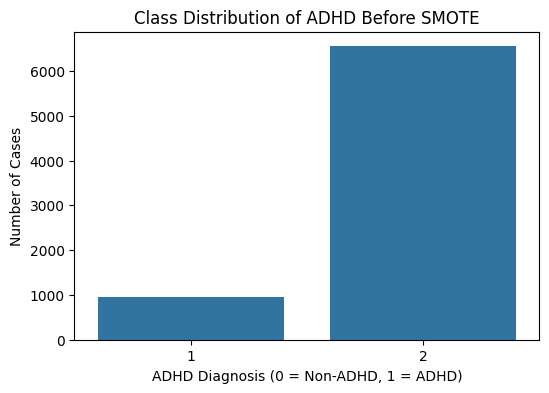

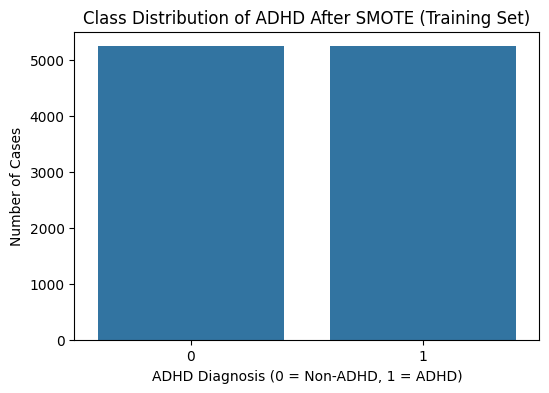

In [168]:
# Before SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x="ADHDEV_C", data=df_scaled)
plt.title("Class Distribution of ADHD Before SMOTE")
plt.xlabel("ADHD Diagnosis (0 = Non-ADHD, 1 = ADHD)")
plt.ylabel("Number of Cases")
plt.show()

# After SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_bal)
plt.title("Class Distribution of ADHD After SMOTE (Training Set)")
plt.xlabel("ADHD Diagnosis (0 = Non-ADHD, 1 = ADHD)")
plt.ylabel("Number of Cases")
plt.show()



In [169]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Clean/confirm target to 0/1
label_map = {1:1, '1':1, 2:0, '2':0, 0:0}
df = df_scaled.copy()
df = df[df['ADHDEV_C'].isin([0,1,'0','1',1,2,'2'])]
df['ADHDEV_C'] = df['ADHDEV_C'].map(label_map).astype(int)

# Remove obvious identifiers from features
maybe_id_cols = [c for c in df.columns if c.upper() in ['HHX']]
use_cols = [c for c in df.columns if c not in (maybe_id_cols + ['ADHDEV_C'])]

# Align numeric/categorical lists with df
numeric = [c for c in numeric_cols if c in use_cols]
categorical = [c for c in cat_cols if c in use_cols]

# rain/test split
X = df[use_cols]
y = df['ADHDEV_C']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [170]:
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway, chi2_contingency

# Clean target to 0/1
label_map = {1:1, '1':1, 2:0, '2':0, 0:0}
df = df_scaled.copy()
df = df[df["ADHDEV_C"].isin([0,1,'0','1',1,2,'2'])].copy()
df["ADHDEV_C"] = df["ADHDEV_C"].map(label_map).astype(int)

# Remove obvious IDs from features
maybe_id_cols = [c for c in df.columns if c.upper() in ["HHX"]]
feature_cols = [c for c in df.columns if c not in (maybe_id_cols + ["ADHDEV_C"])]

numeric_fixed = [c for c in numeric_cols if c in feature_cols]
categorical_fixed = [c for c in cat_cols if c in feature_cols]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df[feature_cols], df["ADHDEV_C"], test_size=0.2, stratify=df["ADHDEV_C"], random_state=42
)

def safe_numeric(s):
    return pd.to_numeric(s, errors="coerce")

def cramers_v(x, y):
    ct = pd.crosstab(x, y)
    if ct.shape[0] < 2 or ct.shape[1] < 2:
        return np.nan, np.nan  # not meaningful
    chi2, p, dof, exp = chi2_contingency(ct)
    n = ct.values.sum()
    r, k = ct.shape
    phi2 = chi2 / n
    v = np.sqrt(phi2 / (min(r-1, k-1))) if min(r-1, k-1) > 0 else np.nan
    return v, p

# Compute ANOVA (numeric) on TRAIN ONLY
anova_records = []
for col in numeric_fixed:
    s = safe_numeric(X_train[col])
    g0 = s[y_train == 0].dropna()
    g1 = s[y_train == 1].dropna()
    if len(g0) > 1 and len(g1) > 1:
        try:
            F, p = f_oneway(g0, g1)
        except Exception:
            F, p = np.nan, np.nan
    else:
        F, p = np.nan, np.nan
    anova_records.append({
        "feature": col,
        "type": "numeric",
        "anova_F": F,
        "anova_p": p,
        "missing_pct": s.isna().mean()
    })
anova_df = pd.DataFrame(anova_records)

# Compute Chi-square/Cramér’s V (categorical) on TRAIN ONLY
chi_records = []
for col in categorical_fixed:
    x = X_train[col].astype(str)
    v, p = cramers_v(x, y_train)
    chi_records.append({
        "feature": col,
        "type": "categorical",
        "cramers_v": v,
        "chi2_p": p,
        "n_levels": x.nunique(),
        "missing_pct": x.isna().mean() if x.isna().any() else 0.0
    })
chi_df = pd.DataFrame(chi_records)

# ---- Shortlists ----
ALPHA = 0.05
V_MIN = 0.10

top10_numeric = (
    anova_df[anova_df["anova_p"] < ALPHA]
    .sort_values("anova_F", ascending=False)
    .head(10)
    .assign(effect_size=lambda d: d["anova_F"])
    .reset_index(drop=True)
)

top10_categorical = (
    chi_df[(chi_df["chi2_p"] < ALPHA) & (chi_df["cramers_v"] > V_MIN)]
    .sort_values("cramers_v", ascending=False)
    .head(10)
    .assign(effect_size=lambda d: d["cramers_v"])
    .reset_index(drop=True)
)

print("== Top 10 numeric (ANOVA) ==")
print(top10_numeric[["feature","effect_size","anova_p","missing_pct"]])

print("\n== Top 10 categorical (Cramér’s V) ==")
print(top10_categorical[["feature","effect_size","n_levels","chi2_p","missing_pct"]])


== Top 10 numeric (ANOVA) ==
        feature  effect_size       anova_p  missing_pct
0        AGEP_C   184.022206  2.600421e-41          0.0
1  SCHDYMSSTC_C   103.833566  3.461963e-24          0.0
2   PARAGETC1_C    54.136916  2.121025e-13          0.0
3  PCNTPARNTS_C    44.306180  3.057838e-11          0.0
4   PARAGETC2_C    33.422605  7.789472e-09          0.0
5  EMERG12MTC_C    19.644046  9.495664e-06          0.0
6  URGCC12MTC_C    14.562541  1.369485e-04          0.0
7   FDSNEDAYS_C    13.653058  2.218433e-04          0.0
8   HOUYRSLIV_C    12.280132  4.611514e-04          0.0
9    POVRATTC_C     5.641102  1.757546e-02          0.0

== Top 10 categorical (Cramér’s V) ==
        feature  effect_size  n_levels         chi2_p  missing_pct
0        MHRX_C     0.605487         5   0.000000e+00          0.0
1   BEHDFCNTR_C     0.407635         8  8.102811e-211          0.0
2  REMEMBERDF_C     0.377857         8  1.563029e-180          0.0
3   SCHSPEDEV_C     0.366386         2  4.976494

Row-normalized cross-tab of MHRX_C vs ADHD (train):
ADHDEV_C       0      1
MHRX_C                 
1          25.00  75.00
1.0        25.96  74.04
2          71.97  28.03
2.0        94.31   5.69
8         100.00   0.00


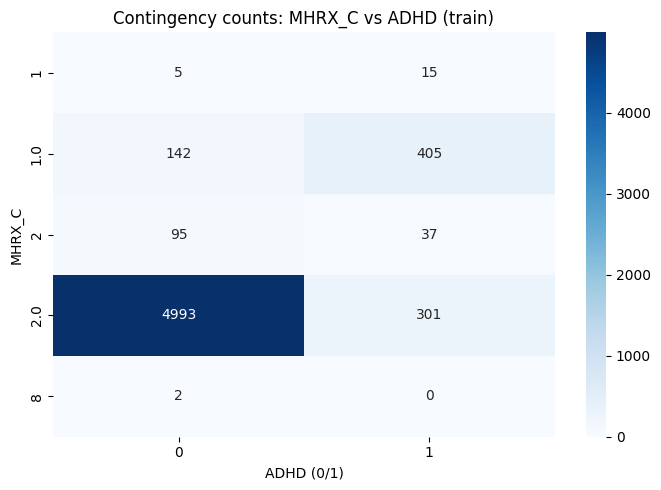

In [171]:
cat_var = top10_categorical.loc[0, "feature"]
ct = pd.crosstab(X_train[cat_var].astype(str), y_train, normalize="index") * 100
print(f"Row-normalized cross-tab of {cat_var} vs ADHD (train):")
print(ct.round(2))

plt.figure(figsize=(7,5))
sns.heatmap(pd.crosstab(X_train[cat_var].astype(str), y_train), annot=True, fmt="d", cmap="Blues")
plt.title(f"Contingency counts: {cat_var} vs ADHD (train)")
plt.xlabel("ADHD (0/1)")
plt.ylabel(cat_var)
plt.tight_layout()
plt.show()


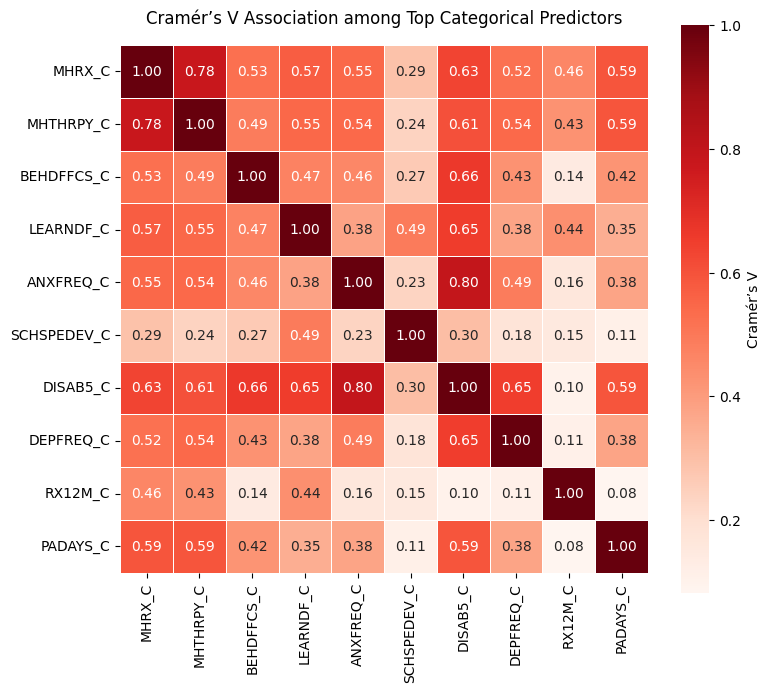

In [172]:
from scipy.stats import chi2_contingency
# Define function for pairwise Cramér’s V
def cramers_v_matrix(df, cols):
    """
    Compute Cramér’s V association matrix between categorical columns.
    """
    n = len(cols)
    result = pd.DataFrame(np.zeros((n, n)), index=cols, columns=cols)
    for i, col1 in enumerate(cols):
        for j, col2 in enumerate(cols):
            if i >= j:
                continue
            # Cross-tab and chi-square
            table = pd.crosstab(df[col1].astype(str), df[col2].astype(str))
            chi2, _, _, _ = chi2_contingency(table)
            n_obs = table.values.sum()
            phi2 = chi2 / n_obs
            r, k = table.shape
            V = np.sqrt(phi2 / (min(k - 1, r - 1)))
            result.loc[col1, col2] = V
            result.loc[col2, col1] = V
    np.fill_diagonal(result.values, 1.0)
    return result

# Choose top categorical predictors
top_cats = [
    "MHRX_C", "MHTHRPY_C", "BEHDFFCS_C", "LEARNDF_C", "ANXFREQ_C",
    "SCHSPEDEV_C", "DISAB5_C", "DEPFREQ_C", "RX12M_C", "PADAYS_C"
]

# Compute and visualize categorical association matrix
cramer_corr = cramers_v_matrix(df_scaled[top_cats], top_cats)

plt.figure(figsize=(8,7))
sns.heatmap(cramer_corr, annot=True, fmt=".2f", cmap="Reds",
            square=True, linewidths=0.5, cbar_kws={"label": "Cramér’s V"})
plt.title("Cramér’s V Association among Top Categorical Predictors", fontsize=12, pad=15)
plt.tight_layout()
plt.show()


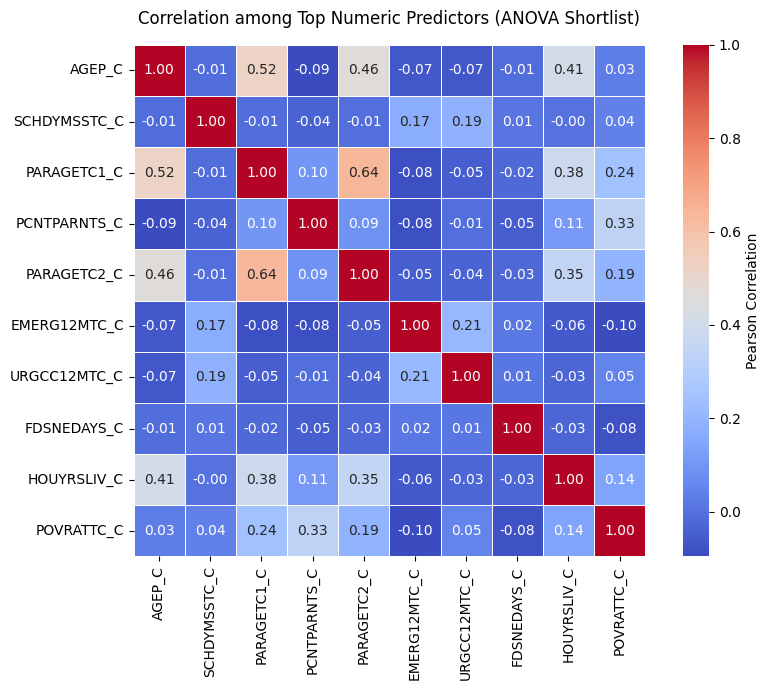

In [173]:
# Select the top numeric features
num_for_heatmap = [
    "AGEP_C", "SCHDYMSSTC_C", "PARAGETC1_C", "PCNTPARNTS_C",
    "PARAGETC2_C", "EMERG12MTC_C", "URGCC12MTC_C",
    "FDSNEDAYS_C", "HOUYRSLIV_C", "POVRATTC_C"
]

# Compute Pearson correlations (linear association
corr = df_scaled[num_for_heatmap].astype(float).corr(method='pearson')

# Plot correlation heatmap
plt.figure(figsize=(9,7))
sns.heatmap(
    corr, annot=True, fmt=".2f", cmap="coolwarm", square=True,
    linewidths=0.5, cbar_kws={"label": "Pearson Correlation"}
)
plt.title("Correlation among Top Numeric Predictors (ANOVA Shortlist)", fontsize=12, pad=15)
plt.tight_layout()
plt.show()


In [174]:
# Combine categorical and numeric shortlists
final_shortlist = pd.concat([top10_numeric[['feature']], top10_categorical[['feature']]], axis=0, ignore_index=True)

final_shortlist['type'] = final_shortlist['feature'].apply(
    lambda x: 'numeric' if x in list(top10_numeric['feature']) else 'categorical'
)

print(f"Final shortlist created: {len(final_shortlist)} features")
display(final_shortlist)


Final shortlist created: 20 features


,feature,type
0,AGEP_C,numeric
1,SCHDYMSSTC_C,numeric
2,PARAGETC1_C,numeric
3,PCNTPARNTS_C,numeric
4,PARAGETC2_C,numeric
5,EMERG12MTC_C,numeric
6,URGCC12MTC_C,numeric
7,FDSNEDAYS_C,numeric
8,HOUYRSLIV_C,numeric
9,POVRATTC_C,numeric


In [175]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier
from collections import Counter

# Define the shortlist subsets
short_num = [f for f in final_shortlist['feature'] if f in numeric_cols]
short_cat = [f for f in final_shortlist['feature'] if f in cat_cols]

print(f"Shortlisted numeric: {len(short_num)}")
print(f"Shortlisted categorical: {len(short_cat)}")

X_train_short = X_train[short_num + short_cat].copy()
X_test_short  = X_test[short_num + short_cat].copy()

# ColumnTransformer
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)

preprocess = ColumnTransformer([
    ('cat', ohe, short_cat),
    ('num', 'passthrough', short_num)
])

def get_feature_names_ohe(prep, cat_name='cat', num_name='num'):
    cat_names = prep.named_transformers_[cat_name].get_feature_names_out(short_cat)
    num_names = np.array(short_num)
    return np.concatenate([cat_names, num_names], axis=0)

# Wrapper: RFE
logit = LogisticRegression(penalty='l2', solver='liblinear',
                           class_weight='balanced', max_iter=500)
n_keep = min(40, max(10, len(short_num) + len(short_cat)//2))

pipe_rfe = Pipeline([
    ('prep', preprocess),
    ('rfe', RFE(estimator=logit, n_features_to_select=n_keep, step=0.1))
])
pipe_rfe.fit(X_train_short, y_train)

rfe_mask = pipe_rfe.named_steps['rfe'].support_
rfe_feat_names = get_feature_names_ohe(pipe_rfe.named_steps['prep'])
rfe_selected_encoded = np.array(rfe_feat_names)[rfe_mask]

# Embedded: L1 Logistic
pipe_l1 = Pipeline([
    ('prep', preprocess),
    ('clf', LogisticRegression(penalty='l1', solver='liblinear',
                               class_weight='balanced', max_iter=1000))
])
pipe_l1.fit(X_train_short, y_train)
coef = pipe_l1.named_steps['clf'].coef_.ravel()
mask_l1 = np.abs(coef) > 1e-9
l1_feat_names = get_feature_names_ohe(pipe_l1.named_steps['prep'])
l1_selected_encoded = np.array(l1_feat_names)[mask_l1]

# Embedded: LightGBM
pipe_lgbm = Pipeline([
    ('prep', preprocess),
    ('clf', LGBMClassifier(n_estimators=600, learning_rate=0.05,
                           subsample=0.8, colsample_bytree=0.8,
                           class_weight='balanced', random_state=42))
])
pipe_lgbm.fit(X_train_short, y_train)
lgbm_feat_names = get_feature_names_ohe(pipe_lgbm.named_steps['prep'])
importances = pipe_lgbm.named_steps['clf'].feature_importances_
imp_df = pd.DataFrame({'feature': lgbm_feat_names, 'importance': importances})
lgbm_selected_encoded = imp_df.sort_values('importance', ascending=False).head(40)['feature']

# Map back to base column names
def base_col(name):
    if '=' in name: return name.split('=')[0]
    for c in short_cat:
        if name.startswith(c + '_'): return c
    return name

rfe_base = {base_col(f) for f in rfe_selected_encoded}
l1_base  = {base_col(f) for f in l1_selected_encoded}
lgb_base = {base_col(f) for f in lgbm_selected_encoded}

# Combine evidence
bags = [set(short_num + short_cat), rfe_base, l1_base, lgb_base]
counter = Counter()
for s in bags: counter.update(s)

union_base = sorted(set().union(*bags))
final_base_features = sorted([f for f, c in counter.items() if c >= 2])

print(f"Union count: {len(union_base)}")
print(f"Intersection (≥2 methods): {len(final_base_features)}")

final_shortlist = pd.DataFrame({
    'feature': final_base_features,
    'source_count': [counter[f] for f in final_base_features]
}).sort_values('source_count', ascending=False)

display(final_shortlist)


Shortlisted numeric: 10
Shortlisted categorical: 10
[LightGBM] [Info] Number of positive: 758, number of negative: 5237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 5995, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Union count: 20
Intersection (≥2 methods): 20


,feature,source_count
1,ANXFREQ_C,4
2,BEHDFCHG_C,4
3,BEHDFCNTR_C,4
4,BEHDFFCS_C,4
16,REMEMBERDF_C,4
9,LEARNDF_C,4
10,MHRX_C,4
18,SCHSPEDEV_C,4
0,AGEP_C,3
6,EMERG12MTC_C,3


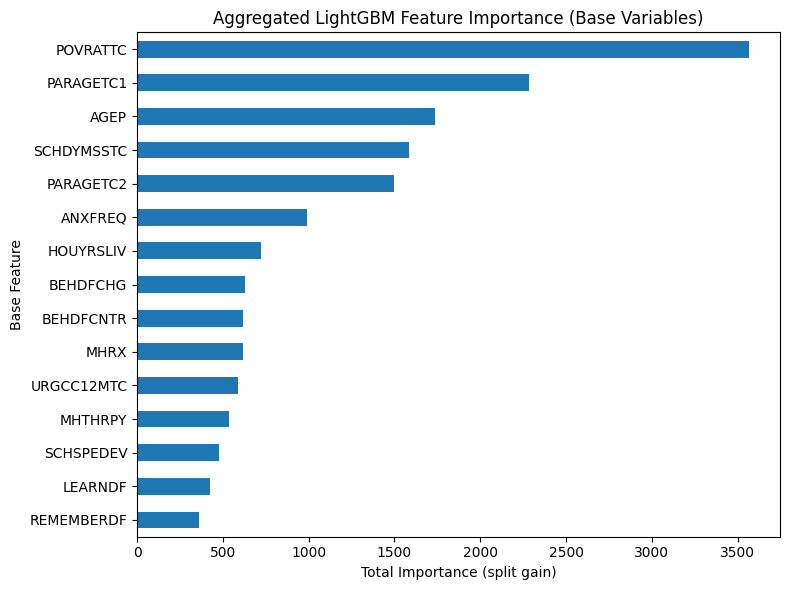

In [176]:
# Aggregate LightGBM importance by
imp_df['base_var'] = imp_df['feature'].str.split('=').str[0].str.split('_').str[0]
agg_imp = imp_df.groupby('base_var')['importance'].sum().sort_values(ascending=False)

ax = agg_imp.head(15).iloc[::-1].plot(kind='barh', figsize=(8,6))
ax.set_title('Aggregated LightGBM Feature Importance (Base Variables)')
ax.set_xlabel('Total Importance (split gain)')
ax.set_ylabel('Base Feature')
plt.tight_layout()
plt.show()


In [177]:
[
  "POVRATTC_C", "PARAGETC1_C", "AGEP_C", "SCHDYMSSTC_C", "PARAGETC2_C",
  "ANXFREQ_C", "HOUYRSLIV_C", "BEHDFCNTR_C", "BEHDFCHG_C", "MHRX_C",
  "URGCC12MTC_C",
  "MHTHRPY_C", "SCHSPEDEV_C", "REMEMBERDF_C", "LEARNDF_C"
]


['POVRATTC_C',
 'PARAGETC1_C',
 'AGEP_C',
 'SCHDYMSSTC_C',
 'PARAGETC2_C',
 'ANXFREQ_C',
 'HOUYRSLIV_C',
 'BEHDFCNTR_C',
 'BEHDFCHG_C',
 'MHRX_C',
 'URGCC12MTC_C',
 'MHTHRPY_C',
 'SCHSPEDEV_C',
 'REMEMBERDF_C',
 'LEARNDF_C']

In [178]:
# Declare the final 15
final_shortlist = [
    "POVRATTC_C","PARAGETC1_C","AGEP_C","SCHDYMSSTC_C","PARAGETC2_C",
    "ANXFREQ_C","HOUYRSLIV_C","BEHDFCNTR_C","BEHDFCHG_C","MHRX_C",
    "URGCC12MTC_C",
    "MHTHRPY_C","SCHSPEDEV_C","REMEMBERDF_C","LEARNDF_C"
]


present = [c for c in final_shortlist if c in X_train.columns]
missing  = [c for c in final_shortlist if c not in X_train.columns]
print("Final shortlist present in X_train (n={}):".format(len(present)))
print(present)
print("\nMissing (check spelling / earlier drops):", missing)

sel_categorical = [c for c in cat_cols     if c in present]
sel_numeric     = [c for c in numeric_cols if c in present]
print("\nSelected categoricals ({}):".format(len(sel_categorical)), sel_categorical)
print("Selected numerics ({}):".format(len(sel_numeric)), sel_numeric)

# Preprocessor for ONLY these 15 features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe_sel = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
preprocess_selected = ColumnTransformer(
    transformers=[
        ("cat", ohe_sel, sel_categorical),
        ("num", "passthrough", sel_numeric),
    ],
    remainder="drop"
)


Final shortlist present in X_train (n=15):
['POVRATTC_C', 'PARAGETC1_C', 'AGEP_C', 'SCHDYMSSTC_C', 'PARAGETC2_C', 'ANXFREQ_C', 'HOUYRSLIV_C', 'BEHDFCNTR_C', 'BEHDFCHG_C', 'MHRX_C', 'URGCC12MTC_C', 'MHTHRPY_C', 'SCHSPEDEV_C', 'REMEMBERDF_C', 'LEARNDF_C']

Missing (check spelling / earlier drops): []

Selected categoricals (8): ['LEARNDF_C', 'BEHDFCHG_C', 'BEHDFCNTR_C', 'REMEMBERDF_C', 'SCHSPEDEV_C', 'MHTHRPY_C', 'MHRX_C', 'ANXFREQ_C']
Selected numerics (7): ['AGEP_C', 'POVRATTC_C', 'SCHDYMSSTC_C', 'URGCC12MTC_C', 'PARAGETC2_C', 'PARAGETC1_C', 'HOUYRSLIV_C']


In [179]:
final_shortlist = [
    "POVRATTC_C","PARAGETC1_C","AGEP_C","SCHDYMSSTC_C","PARAGETC2_C",
    "ANXFREQ_C","HOUYRSLIV_C","BEHDFCNTR_C","BEHDFCHG_C","MHRX_C",
    "URGCC12MTC_C",
    "MHTHRPY_C","SCHSPEDEV_C","REMEMBERDF_C","LEARNDF_C"
]

In [180]:
from sklearn.model_selection import train_test_split

df_ml = df_scaled.copy()

# Target cleaning (0/1)
label_map = {1:1, '1':1, 2:0, '2':0, 0:0}
df_ml = df_ml[df_ml['ADHDEV_C'].isin([0,1,'0','1',1,2,'2'])].copy()
df_ml['ADHDEV_C'] = df_ml['ADHDEV_C'].map(label_map).astype(int)

# final shortlist (15 features)
final_shortlist = [
    "POVRATTC_C","PARAGETC1_C","AGEP_C","SCHDYMSSTC_C","PARAGETC2_C",
    "ANXFREQ_C","HOUYRSLIV_C","BEHDFCNTR_C","BEHDFCHG_C","MHRX_C",
    "URGCC12MTC_C","MHTHRPY_C","SCHSPEDEV_C","REMEMBERDF_C","LEARNDF_C"
]

# keep rows with all shortlist columns present
missing_cols = [c for c in final_shortlist if c not in df_ml.columns]
assert not missing_cols, f"Missing columns in df_ml: {missing_cols}"


categorical_cols = ["ANXFREQ_C","BEHDFCNTR_C","BEHDFCHG_C","MHRX_C",
                    "MHTHRPY_C","SCHSPEDEV_C","REMEMBERDF_C","LEARNDF_C"]
for c in categorical_cols:
    df_ml[c] = df_ml[c].astype('category')

# Numeric columns in the shortlist
numeric_cols = ["POVRATTC_C","PARAGETC1_C","AGEP_C","SCHDYMSSTC_C",
                "PARAGETC2_C","HOUYRSLIV_C","URGCC12MTC_C"]


X = df_ml[final_shortlist].copy()
y = df_ml['ADHDEV_C'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Canonical dataset ready.")
print("Categoricals (as 'category'):", [c for c in categorical_cols if X_train[c].dtype.name=='category'])
print("Numerics:", numeric_cols)


Canonical dataset ready.
Categoricals (as 'category'): ['ANXFREQ_C', 'BEHDFCNTR_C', 'BEHDFCHG_C', 'MHRX_C', 'MHTHRPY_C', 'SCHSPEDEV_C', 'REMEMBERDF_C', 'LEARNDF_C']
Numerics: ['POVRATTC_C', 'PARAGETC1_C', 'AGEP_C', 'SCHDYMSSTC_C', 'PARAGETC2_C', 'HOUYRSLIV_C', 'URGCC12MTC_C']


In [181]:
import itertools
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)


df_ml = df_scaled.copy()

# Target to 0/1
label_map = {1:1, '1':1, 2:0, '2':0, 0:0}
df_ml = df_ml[df_ml['ADHDEV_C'].isin([0,1,'0','1',1,2,'2'])].copy()
df_ml['ADHDEV_C'] = df_ml['ADHDEV_C'].map(label_map).astype(int)

# Final 15 features
final_shortlist = [
    "POVRATTC_C","PARAGETC1_C","AGEP_C","SCHDYMSSTC_C","PARAGETC2_C",
    "ANXFREQ_C","HOUYRSLIV_C","BEHDFCNTR_C","BEHDFCHG_C","MHRX_C",
    "URGCC12MTC_C","MHTHRPY_C","SCHSPEDEV_C","REMEMBERDF_C","LEARNDF_C"
]
missing_cols = [c for c in final_shortlist if c not in df_ml.columns]
assert not missing_cols, f"Missing columns in df_ml: {missing_cols}"

# Categorical / numeric split
categorical_cols = ["ANXFREQ_C","BEHDFCNTR_C","BEHDFCHG_C","MHRX_C",
                    "MHTHRPY_C","SCHSPEDEV_C","REMEMBERDF_C","LEARNDF_C"]
numeric_cols = ["POVRATTC_C","PARAGETC1_C","AGEP_C","SCHDYMSSTC_C",
                "PARAGETC2_C","HOUYRSLIV_C","URGCC12MTC_C"]

# Modeling matrix + split
X = df_ml[final_shortlist].copy()
y = df_ml['ADHDEV_C'].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Preprocess
preprocess_selected = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols),
    ],
    remainder='drop'
)

# Base models
models = {
    "LR":  LogisticRegression(class_weight='balanced', max_iter=1000),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "RF":  RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=42),
    "GBM": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
}

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    return {
        "AUC":  roc_auc_score(y_test, y_prob),
        "ACC":  accuracy_score(y_test, y_pred),
        "PREC": precision_score(y_test, y_pred),
        "REC":  recall_score(y_test, y_pred),
        "F1":   f1_score(y_test, y_pred),
        "y_pred": y_pred
    }

results = []
best = {"score": -1, "metric": "AUC", "name": None, "clf": None, "y_pred": None}

for r in [2, 3, 4]:
    for combo in itertools.combinations(models.keys(), r):
        ests = [(n, models[n]) for n in combo]
        ensemble = Pipeline([
            ("prep", preprocess_selected),
            ("clf", VotingClassifier(estimators=ests, voting='soft'))
        ])
        ensemble.fit(X_train, y_train)
        out = evaluate(ensemble, X_test, y_test)
        row = {"Model": "+".join(combo), **{k:v for k,v in out.items() if k != "y_pred"}}
        results.append(row)

        metric_val = out["AUC"]
        if metric_val > best["score"]:
            best.update({"score": metric_val, "name": "+".join(combo), "clf": ensemble, "y_pred": out["y_pred"]})

res_df = pd.DataFrame(results).sort_values(best["metric"], ascending=False).reset_index(drop=True)
print("\n=== Ensemble Model Comparison (sorted by {} ) ===".format(best["metric"]))
print(res_df[["Model","AUC","ACC","PREC","REC","F1"]])

# Detailed evaluation of the chosen model
print(f"\nSelected best-by-{best['metric']} model: {best['name']}")
y_pred = best["y_pred"]
y_prob = best["clf"].predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
spec = recall_score(y_test, y_pred, pos_label=0)

print(f"\nAUC: {auc:.3f} | ACC: {acc:.3f} | PREC: {prec:.3f} | REC: {rec:.3f} | SPEC: {spec:.3f} | F1: {f1:.3f}")



=== Ensemble Model Comparison (sorted by AUC ) ===
            Model       AUC       ACC      PREC       REC        F1
0       LR+RF+GBM  0.941508  0.923282  0.698925  0.687831  0.693333
1           LR+RF  0.941092  0.915944  0.645161  0.740741  0.689655
2   LR+SVM+RF+GBM  0.940979  0.923949  0.707182  0.677249  0.691892
3       LR+SVM+RF  0.940583  0.919280  0.673469  0.698413  0.685714
4          LR+GBM  0.939961  0.915944  0.652174  0.714286  0.681818
5      LR+SVM+GBM  0.939489  0.918612  0.670051  0.698413  0.683938
6      SVM+RF+GBM  0.938616  0.931288  0.798611  0.608466  0.690691
7          RF+GBM  0.938588  0.929953  0.800000  0.592593  0.680851
8         SVM+GBM  0.938160  0.928619  0.766234  0.624339  0.688047
9          LR+SVM  0.937554  0.911274  0.623894  0.746032  0.679518
10         SVM+RF  0.934630  0.927952  0.787234  0.587302  0.672727

Selected best-by-AUC model: LR+RF+GBM

AUC: 0.942 | ACC: 0.923 | PREC: 0.699 | REC: 0.688 | SPEC: 0.957 | F1: 0.693



Training LR + RF ...
LR + RF 
AUC: 0.941 | ACC: 0.916 | PREC: 0.645 | REC: 0.741 | SPEC: 0.941 | F1: 0.690

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1310
           1       0.65      0.74      0.69       189

    accuracy                           0.92      1499
   macro avg       0.80      0.84      0.82      1499
weighted avg       0.92      0.92      0.92      1499



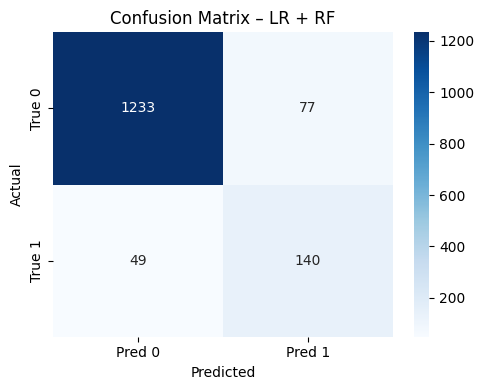

Confusion Matrix (values):
 [[1233   77]
 [  49  140]]

Training LR + RF + GBM ...
LR + RF + GBM 
AUC: 0.942 | ACC: 0.923 | PREC: 0.699 | REC: 0.688 | SPEC: 0.957 | F1: 0.693

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1310
           1       0.70      0.69      0.69       189

    accuracy                           0.92      1499
   macro avg       0.83      0.82      0.82      1499
weighted avg       0.92      0.92      0.92      1499



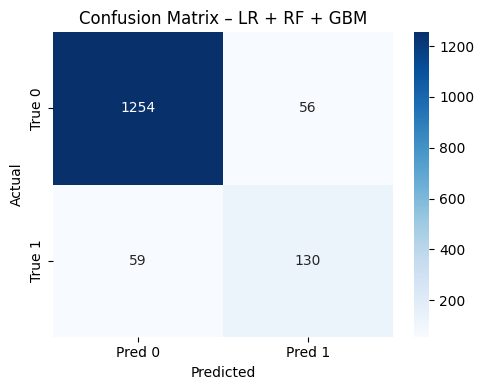

Confusion Matrix (values):
 [[1254   56]
 [  59  130]]


In [182]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix, classification_report)
from sklearn.pipeline import Pipeline

def train_and_cm(name, estimators, X_train, y_train, X_test, y_test):
    model = Pipeline([
        ("prep", preprocess_selected),
        ("clf",  VotingClassifier(estimators=estimators, voting='soft'))
    ])
    print(f"\nTraining {name} ...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    auc  = roc_auc_score(y_test, y_prob)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    spec = recall_score(y_test, y_pred, pos_label=0)

    print(f"{name} ")
    print(f"AUC: {auc:.3f} | ACC: {acc:.3f} | PREC: {prec:.3f} | REC: {rec:.3f} | SPEC: {spec:.3f} | F1: {f1:.3f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
    plt.title(f"Confusion Matrix – {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    print("Confusion Matrix (values):\n", cm)
    return model, cm

# Base learners
lr  = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
rf  = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=42)
gbm = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)

# Train & plot for two finalists
best_model_lr_rf, cm_lr_rf = train_and_cm("LR + RF",
    [("lr", lr), ("rf", rf)], X_train, y_train, X_test, y_test)

best_model_lr_rf_gbm, cm_lr_rf_gbm = train_and_cm("LR + RF + GBM",
    [("lr", lr), ("rf", rf), ("gbm", gbm)], X_train, y_train, X_test, y_test)


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df_ml = df_scaled.copy()

# Label cleaning
label_map = {1:1, '1':1, 2:0, '2':0, 0:0}
df_ml = df_ml[df_ml['ADHDEV_C'].isin([0,1,'0','1',1,2,'2'])].copy()
df_ml['ADHDEV_C'] = df_ml['ADHDEV_C'].map(label_map).astype(int)

# Final 15 features
final_shortlist = [
    "POVRATTC_C","PARAGETC1_C","AGEP_C","SCHDYMSSTC_C","PARAGETC2_C",
    "ANXFREQ_C","HOUYRSLIV_C","BEHDFCNTR_C","BEHDFCHG_C","MHRX_C",
    "URGCC12MTC_C","MHTHRPY_C","SCHSPEDEV_C","REMEMBERDF_C","LEARNDF_C"
]
X_full = df_ml[final_shortlist].copy()
y_full = df_ml['ADHDEV_C'].copy()

# Fill missing
X_full = X_full.fillna(-999)

# Column indices
cat_idx = [i for i, c in enumerate(final_shortlist) if c in
           ["ANXFREQ_C","BEHDFCNTR_C","BEHDFCHG_C","MHRX_C",
            "MHTHRPY_C","SCHSPEDEV_C","REMEMBERDF_C","LEARNDF_C"]]
num_idx = [i for i in range(len(final_shortlist)) if i not in cat_idx]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.20, stratify=y_full, random_state=42
)

# unlabeled pool (if ADHDNW_C exists)
if 'ADHDNW_C' in df_ml.columns:
    unlabeled_mask = df_ml['ADHDNW_C'].isna()
    X_unlab = df_ml.loc[unlabeled_mask, final_shortlist].fillna(-999)
else:
    X_unlab = X_train.sample(frac=0.3, random_state=42)

X_st = pd.concat([X_train, X_unlab], axis=0)
y_st = np.concatenate([y_train.values, -1*np.ones(len(X_unlab), dtype=int)])

# Preprocessor
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_idx),
    ("num", "passthrough", num_idx)
])

#Base Ensembles
base_recall = Pipeline([
    ("prep", preprocess),
    ("clf", VotingClassifier(estimators=[
        ("lr", LogisticRegression(max_iter=1000, class_weight="balanced")),
        ("rf", RandomForestClassifier(n_estimators=400, class_weight="balanced", random_state=42)),
    ], voting="soft"))
])

base_balanced = Pipeline([
    ("prep", preprocess),
    ("clf", VotingClassifier(estimators=[
        ("lr", LogisticRegression(max_iter=1000, class_weight="balanced")),
        ("rf", RandomForestClassifier(n_estimators=400, class_weight="balanced", random_state=42)),
        ("gbm", GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42))
    ], voting="soft"))
])

# Wrap in SelfTrainingClassifier
st_recall = SelfTrainingClassifier(base_estimator=base_recall, threshold=0.90, max_iter=20, verbose=False)
st_balanced = SelfTrainingClassifier(base_estimator=base_balanced, threshold=0.90, max_iter=20, verbose=False)

print("\n== Training Self-Training LR + RF (early-detection) ==")
st_recall.fit(X_st.values, y_st)

print("\n== Training Self-Training LR + RF + GBM (balanced) ==")
st_balanced.fit(X_st.values, y_st)

# Evaluate
def evaluate(model, X, y, name):
    y_prob = model.predict_proba(X.values)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)
    auc = roc_auc_score(y, y_prob)
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec  = recall_score(y, y_pred)
    f1   = f1_score(y, y_pred)
    spec = recall_score(y, y_pred, pos_label=0)
    cm   = confusion_matrix(y, y_pred, labels=[0,1])
    print(f"\n== {name} (Semi-supervised) ==")
    print(f"AUC: {auc:.3f} | ACC: {acc:.3f} | PREC: {prec:.3f} | REC: {rec:.3f} | SPEC: {spec:.3f} | F1: {f1:.3f}")
    print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))
    print("Confusion Matrix:\n", cm)
    return {"AUC": auc, "ACC": acc, "PREC": prec, "REC": rec, "SPEC": spec, "F1": f1, "CM": cm}

res_recall = evaluate(st_recall, X_test, y_test, "LR + RF (Self-Training)")
res_balanced = evaluate(st_balanced, X_test, y_test, "LR + RF + GBM (Self-Training)")



== Training Self-Training LR + RF (early-detection) ==

== Training Self-Training LR + RF + GBM (balanced) ==

== LR + RF (Self-Training) (Semi-supervised) ==
AUC: 0.950 | ACC: 0.913 | PREC: 0.629 | REC: 0.762 | SPEC: 0.935 | F1: 0.689

Classification Report:
               precision    recall  f1-score   support

           0      0.965     0.935     0.950      1310
           1      0.629     0.762     0.689       189

    accuracy                          0.913      1499
   macro avg      0.797     0.849     0.819      1499
weighted avg      0.922     0.913     0.917      1499

Confusion Matrix:
 [[1225   85]
 [  45  144]]

== LR + RF + GBM (Self-Training) (Semi-supervised) ==
AUC: 0.949 | ACC: 0.920 | PREC: 0.677 | REC: 0.698 | SPEC: 0.952 | F1: 0.688

Classification Report:
               precision    recall  f1-score   support

           0      0.956     0.952     0.954      1310
           1      0.677     0.698     0.688       189

    accuracy                          0.920 


=== Confusion Matrix for LR + RF (Self-Training) ===
Confusion Matrix (values):
 [[1225   85]
 [  45  144]]


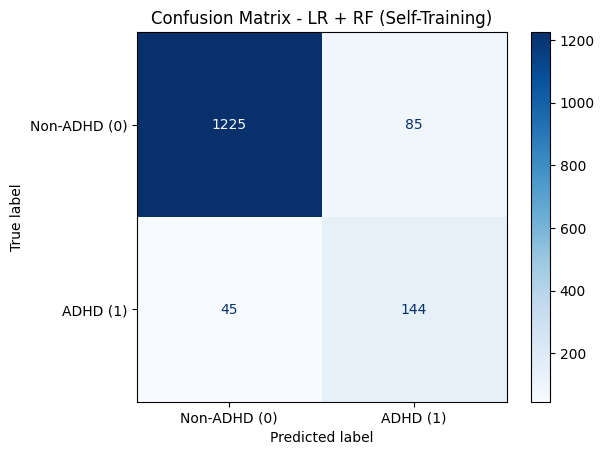


=== Confusion Matrix for LR + RF + GBM (Self-Training) ===
Confusion Matrix (values):
 [[1247   63]
 [  57  132]]


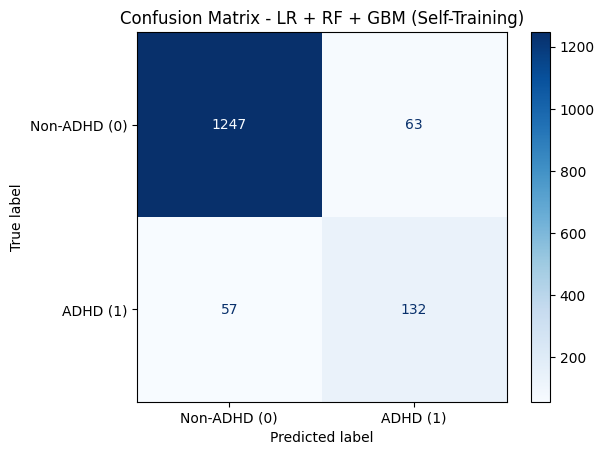

In [184]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate both semi-supervised models
models_to_check = {
    "LR + RF (Self-Training)": st_recall,
    "LR + RF + GBM (Self-Training)": st_balanced
}

for name, model in models_to_check.items():
    print(f"\n=== Confusion Matrix for {name} ===")

    # Get predictions
    y_pred = model.predict(X_test.values)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])

    # Display numerical results
    print("Confusion Matrix (values):\n", cm)

    # Visual display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-ADHD (0)", "ADHD (1)"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
